In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
from collections import Counter, defaultdict

# Preprocessing and Feature Engineering
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
import category_encoders as ce

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


# Model Evaluation
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold

# Pipeline
from sklearn.pipeline import Pipeline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting
%matplotlib inline


In [2]:
start_time = time.time()

In [3]:
# Load the CSV file into a DataFrame
test = pd.read_csv("test.csv", index_col=0)
train = pd.read_csv("train.csv", index_col=0)

# Part 1: Explorization 
#### 1.1 Explorating the dataset

In [4]:
# Print the shape of the data
print(f"The shape of the train data set : {train.shape[0]} rows and {train.shape[1]} columns")
print(f"The shape of the test data set : {test.shape[0]} rows and {test.shape[1]} columns")


The shape of the train data set : 55462 rows and 16 columns
The shape of the test data set : 18000 rows and 15 columns


In [5]:
# make copies 
train_copy = train.copy()
test_copy = test.copy()

In [6]:
#Check for duplicates
train_copy  = train_copy.drop_duplicates()
print(f"The shape of the train data set without duplicates: {train_copy.shape[0]} rows and {train_copy.shape[1]} columns")

test_copy  = test_copy.drop_duplicates()
print(f"The shape of the test data set without duplicates: {test_copy.shape[0]} rows and {test_copy.shape[1]} columns")

The shape of the train data set without duplicates: 55462 rows and 16 columns
The shape of the test data set without duplicates: 18000 rows and 15 columns


In [7]:
# See how the tarin data set looks like:
train_copy

,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
ID,,,,,,,,,,,,,,,,
65168,T,young,No,developer,NaN,Male,No,13.0,-1.093080,1.0,aa,180.984266,NaN,67104.0,Bash/Shell;Java;JavaScript;PowerShell;Python;T...,1
38314,T,young,No,non-developer,other,Male,Yes,7.0,5.444533,7.0,rhz,180.677533,United States of America,101000.0,Bash/Shell;JavaScript;PowerShell;Python;Docker...,0
5209,T,old,No,developer,other,Male,Yes,25.0,1.727255,15.0,aa,177.746162,United States of America,70000.0,Bash/Shell;HTML/CSS;Java;JavaScript;PHP;SQL;Gi...,0
54165,T,young,NaN,developer,other,Male,No,10.0,17.804302,7.0,aa,176.952584,Spain,40956.0,C#;Dart;Delphi;Kotlin;SQL;VBA;Docker;Unity 3D;...,0
42213,T,young,No,developer,BA/BSc,Male,No,12.0,-8.679091,4.0,hr,179.393259,Canada,101509.0,Assembly;Bash/Shell;C++;PowerShell;Python;Rust,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64649,T,young,No,developer,BA/BSc,Male,No,7.0,6.868416,2.0,aa,NaN,United States of America,80000.0,NaN,1
57832,T,NaN,NaN,developer,MA/MSc,Male,No,22.0,2.030205,20.0,ca,178.055004,Brazil,149568.0,Bash/Shell;C++;Java;JavaScript;PHP;SQL;Docker;...,1
47358,T,old,No,developer,BA/BSc,Male,No,35.0,1.473015,35.0,aa,182.771752,United States of America,NaN,Bash/Shell;HTML/CSS;JavaScript;Python;SQL;Type...,1


In [8]:
# Summarize train data Structure and Feature Type
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55462 entries, 65168 to 40806
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   worked_in_the_past   53697 non-null  object 
 1   age_group            52922 non-null  object 
 2   disability           51781 non-null  object 
 3   is_dev               53372 non-null  object 
 4   education            52446 non-null  object 
 5   sex                  52234 non-null  object 
 6   mental_issues        53047 non-null  object 
 7   years_of_experience  52898 non-null  float64
 8   A                    53327 non-null  float64
 9   B                    51927 non-null  float64
 10  C                    52460 non-null  object 
 11  D                    52843 non-null  float64
 12  country              53443 non-null  object 
 13  prev_salary          52798 non-null  float64
 14  stack_experience     41420 non-null  object 
 15  label                55462 non-n

* We can see that the dataset contains a mix of categorical and numerical variables.
* There are more object type variables then numeric type. 
* Except from one int type variable that belongs to the label all numeric type variables are from float type. 


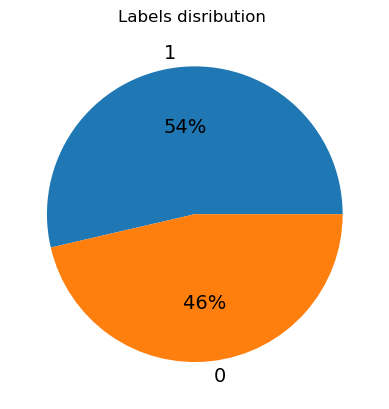

In [9]:
# Visualitation of labels disribution 
train_copy["label"].value_counts().plot.pie(autopct="%1.0f%%", fontsize=14)
plt.title("Labels disribution ", size=12)
plt.ylabel("")
plt.show()

From the this plot we can see that 54% of candidates are hired (Label '1'), while 46% are not hired (Label '0')

#### 1.2 Exploring the Numeric Features

In [10]:
# statistics of numeric features
train_copy.describe()

,years_of_experience,A,B,D,prev_salary,label
count,52898.000000,53327.000000,51927.000000,52843.000000,52798.000000,55462.000000
mean,14.214847,4.003959,9.079612,179.580295,67800.074662,0.536223
std,9.391586,6.392311,7.965858,1.094272,49583.999657,0.498691
min,0.000000,-21.637116,0.000000,175.077992,1.000000,0.000000
25%,7.000000,-0.362863,3.000000,178.843985,28800.000000,0.000000
50%,12.000000,3.606089,7.000000,179.584091,57660.000000,1.000000
75%,20.000000,7.852744,12.000000,180.323694,95979.000000,1.000000
max,50.000000,55.495063,50.000000,184.151007,224000.000000,1.000000


* The years of experience ranges from 0 to 50 years, with a mean of 14.21 years.
* The previous salary has a narrow range and low standard deviation, suggesting salaries are closely clustered around the mean.
* Label Distribution : Fairly balanced between 0 and 1, with a slight skew towards 1 (mean = 0.536223). The fact that mean of the label is approximately 0.54, indicating that, on average, about 54% of candidates were hired (label = 1), As can be seen in the pie chart we created above. 

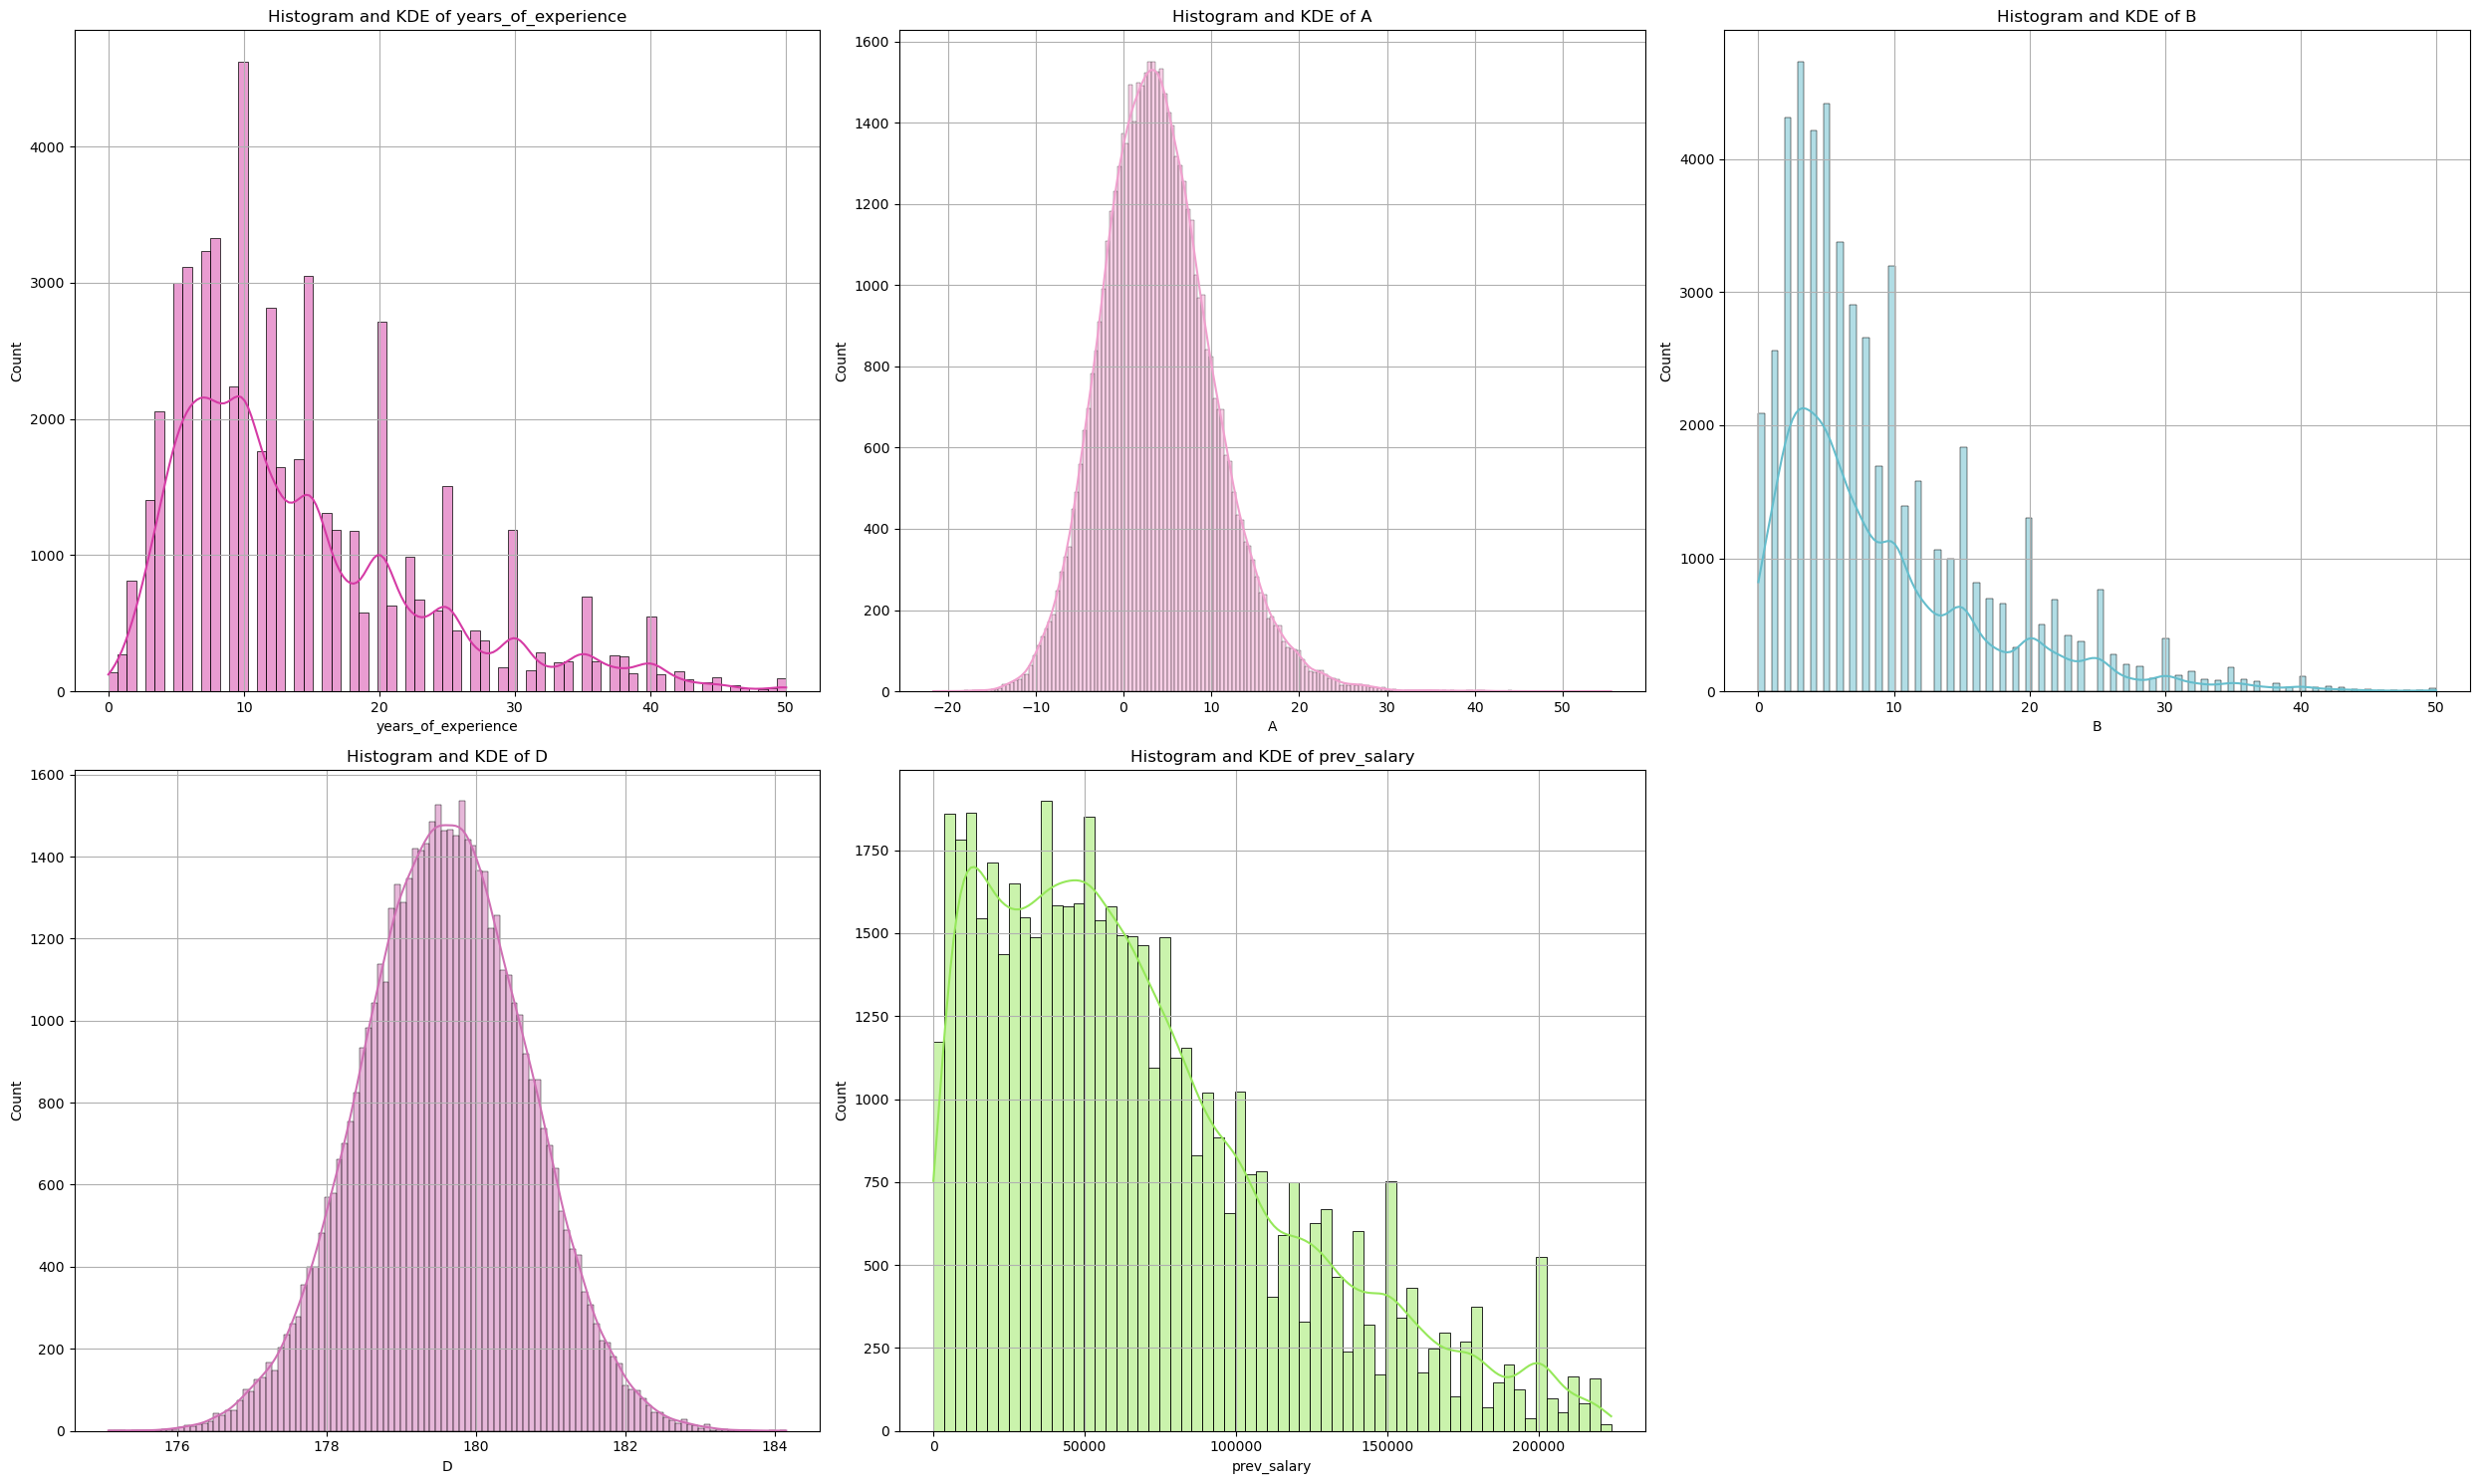

In [11]:
numeric_columns = list(train_copy.select_dtypes(include=np.number).columns[:-1])

# Define the number of rows and columns for subplots
n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate histograms with KDE for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(train_copy[column] , kde=True, color=np.random.rand(3,), ax=axes[i])
    axes[i].set_title(f'Histogram and KDE of {column}')
    axes[i].set_xlabel(column)
    axes[i].grid(True)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


From the histograms we can make several observations:

Histogram and KDE of `years_of_experience`:
1. Distribution is right-skewed, most employees have 5-10 years of experience.
2. Few employees have more than 20 years of experience.

Histogram and KDE of `A`:
1. Distribution is approximately normal, centered around 0.
2. Most values fall within -10 to 10.

Histogram and KDE of `B`:
1. Distribution is heavily right-skewed, with most values around 0-10.
2. Frequency decreases sharply beyond 10.

Histogram and KDE of `D`:
1. Distribution is approximately normal, centered around 180.
2. Most values are tightly clustered around 178-182.

Histogram and KDE of `prev_salary`:
1. Distribution is right-skewed, with most salaries below 50,000.
2. Few employees have salaries above 100,000.

From the graph we can assume "A" and "D" are approximetly normaly distibuted therefore we can recognize outliers using a boxplot

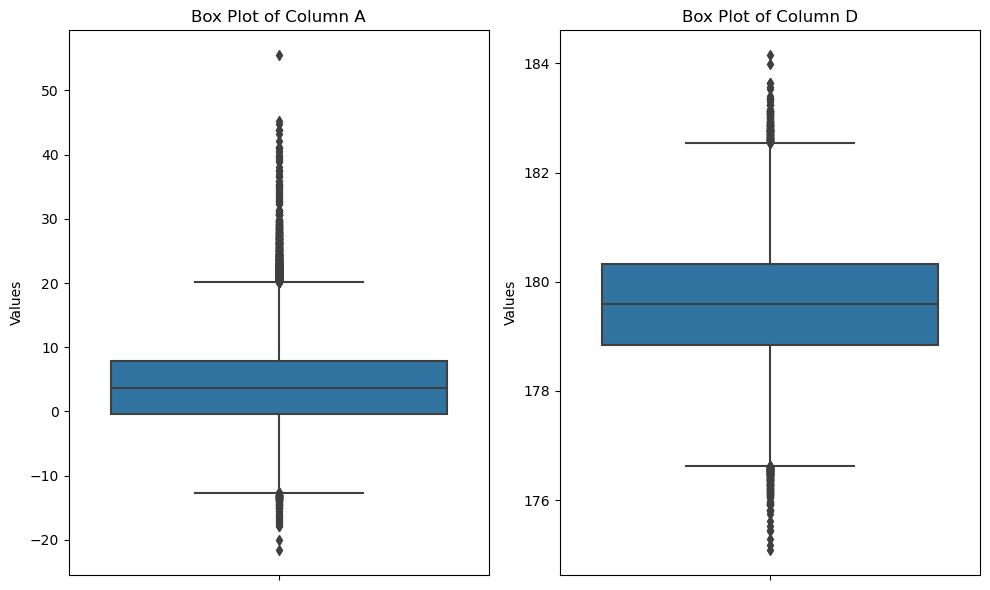

In [12]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Box plot for column A
sns.boxplot(y=train_copy["A"], ax=axs[0])
axs[0].set_title('Box Plot of Column A')
axs[0].set_ylabel('Values')

# Box plot for column D
sns.boxplot(y=train_copy["D"], ax=axs[1])
axs[1].set_title('Box Plot of Column D')
axs[1].set_ylabel('Values')

plt.tight_layout()
plt.show()

#### Box Plot of Column A
- **Outliers**: Column A has a significant number of outliers. There are outliers both above and below the whiskers, with extreme values reaching beyond 50 on the higher end and below -20 on the lower end. This indicates the presence of values far from the central tendency.

#### Box Plot of Column D
- **Outliers**: Column D also has outliers, but they are less extreme compared to Column A. The outliers are mostly on the higher end, slightly above 184, and a few on the lower end, slightly below 176. The range of outliers is narrower compared to Column A, suggesting less extreme deviations from the central tendency.

<AxesSubplot:>

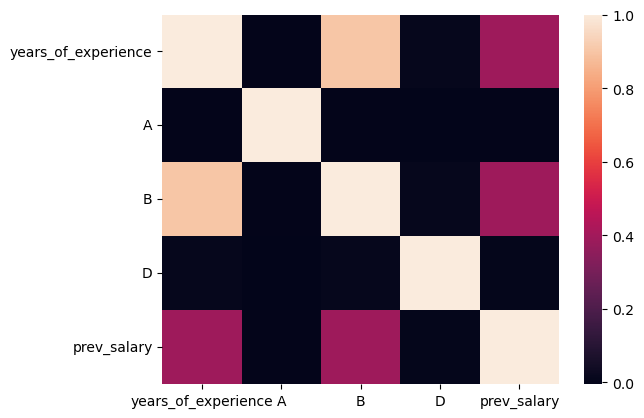

In [13]:
#צריך לשנות את זה ולעשו מפה אחרי שיהיו לנו גם את הערכים הקטגוריאלים במספרים. 
corr = train_copy[numeric_columns].corr()
sns.heatmap(corr)

#### 1.3 Exploring the Categorial Features

In [14]:
# statistics of object features
train_copy.describe(include='object')

,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,C,country,stack_experience
count,53697,52922,51781,53372,52446,52234,53047,52460,53443,41420
unique,2,2,2,2,5,3,2,7,170,39925
top,T,young,No,developer,BA/BSc,Male,No,aa,United States of America,Python
freq,47361,34545,50281,49055,26693,48777,41107,21082,10690,40


Conclusions from the Table:
1. **worked_in_the_past**: Most participants (47,361 out of 53,697) have worked in the past.

2. **age_group**: The majority of participants are classified as 'young'.

3. **disability**: Most participants (50,281 out of 51,781) do not have a disability.

4. **is_dev**: The majority of participants (49,055 out of 53,372) identify as developers.

5. **education**: The most common education level is a Bachelor's degree (BA/BSc), held by 26,693 participants.

6. **sex**: Most participants are male (48,777 out of 52,234).

7. **mental_issues**: Most participants (41,107 out of 53,047) do not report mental issues.

8. **C**:
   - The most frequent category is 'aa', with 21,082 occurrences.
   - There are seven unique categories, indicating some diversity in this variable.

9. **country**:
   - USA is the most represented country, with 10,690 participants.
   - There are 170 unique countries, showcasing a diverse international representation.

10. **stack_experience**:
    - The most common experience is with Python, cited by 40 participants.
    - There is a wide variety of experiences with 39,925 unique entries, indicating diverse technical expertise.



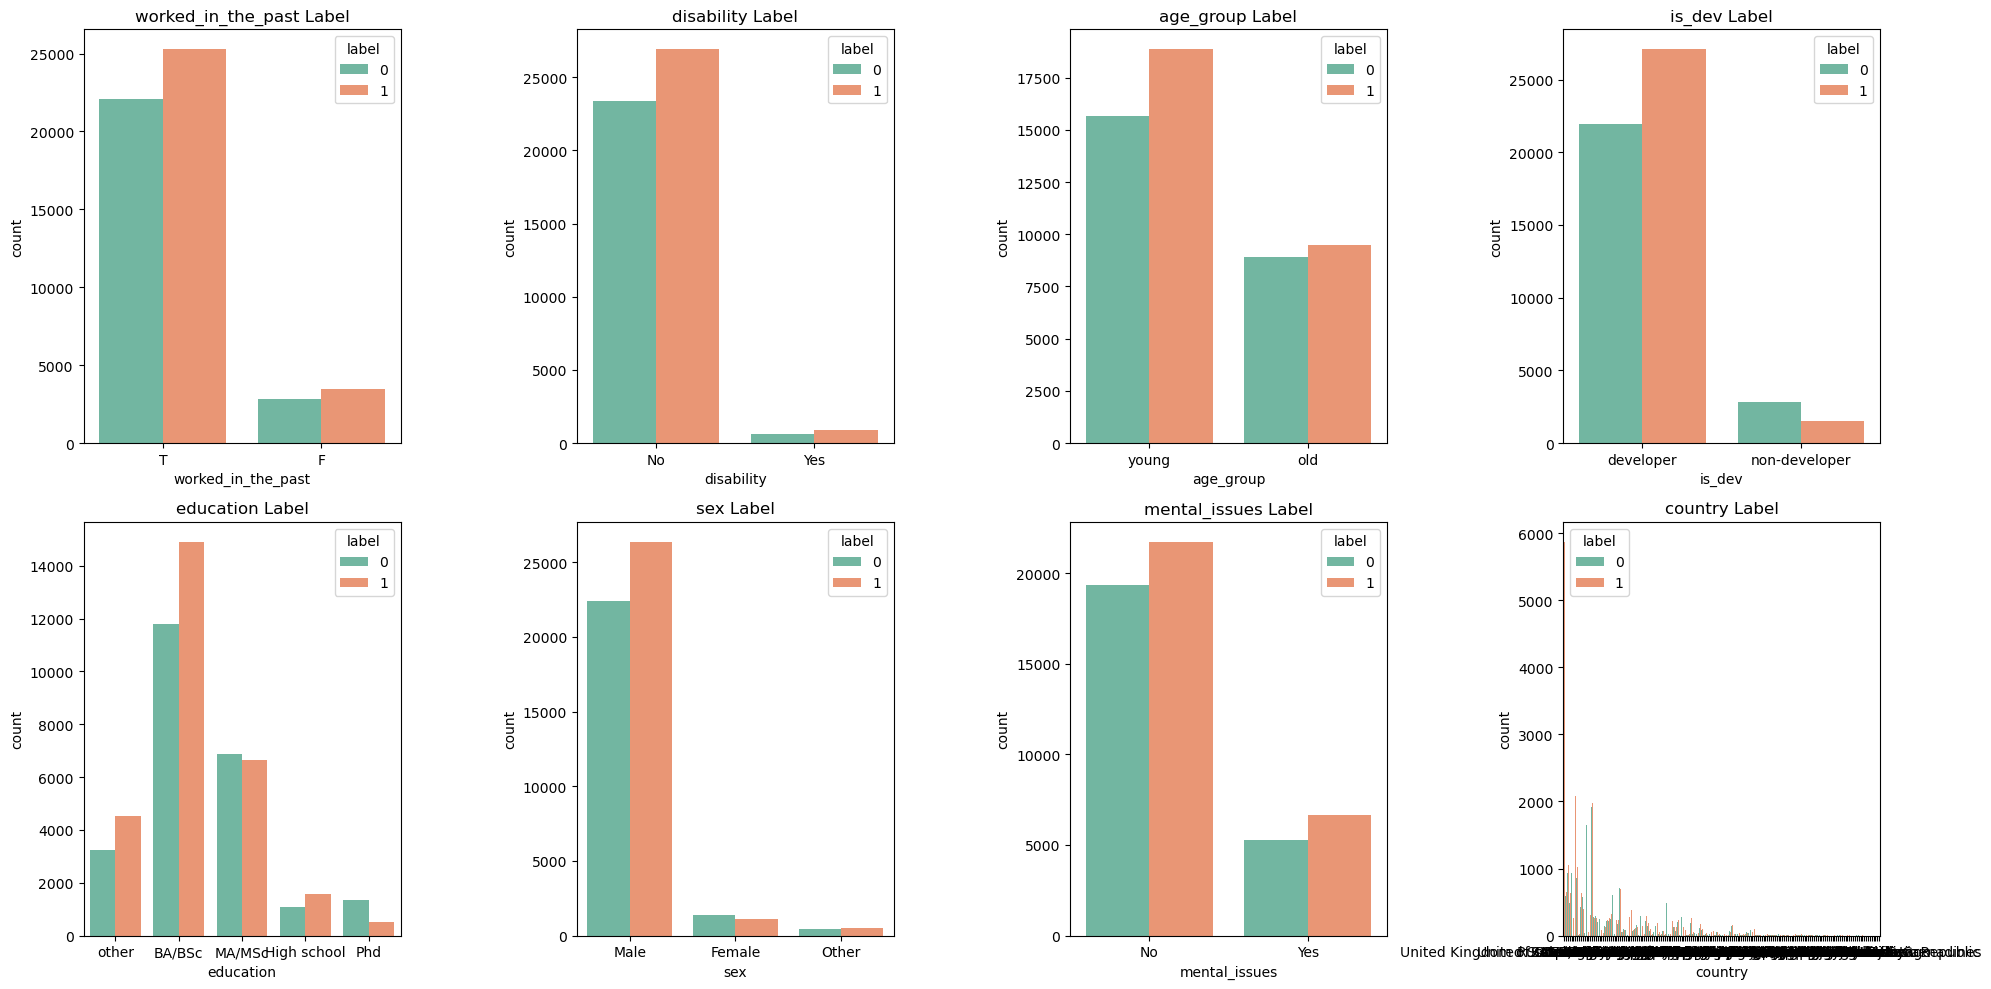

In [15]:
# Sample categorical columns
selected_categorial_columns = ['worked_in_the_past','disability', 'age_group','is_dev', 'education', 'sex', 'mental_issues','country']

# Create subplots
fig, ax = plt.subplots(2,4, figsize=(20, 10), sharex=False)

# Flatten the axes array for easier iteration
ax = ax.flatten()

# Generate count plots for each categorical column
for i, col in enumerate(selected_categorial_columns):
    sns.countplot(data=train_copy, x=col, hue='label', ax=ax[i], palette='Set2').set(title=f'{col} Label')

# Adjust layout
plt.tight_layout()
plt.show()


We can draw the following conclusions from this visualization:
1. *worked_in_the_past, disability, age_group, and mental_issues Labels*:
There is no significant difference in the likelihood of being hired (label 1) across individuals with different work history (worked in the past), disability status, age groups, or mental health status. The hiring rates are similar regardless of these factors.

2. *is_dev and sex Labels*:
Developers are more likely to be hired (label 1) compared to non-developers. Additionally, males have a higher likelihood of being hired (label 1) compared to females. 

3. *education Label*:
Individuals with a Bachelor's degree (BA/BSc), a high school education or other education are more likely to be hired (label 1) compared to those with a Master's degree (MA/MSc) or a PhD. 

4. *country*: 
The graph indicates that this category contains a substantial amount of data, warranting a thorough examination in a dedicated section

5. *stack_experience*:
We didn't create a graph for this column because it took a long time to process, suggesting it contains a large variety of sub-categories. Therefore, it needs to be examined in a dedicated section. 

6. *c* label distribution will be examine in  a dedicated section as well




### 'C' label distribution

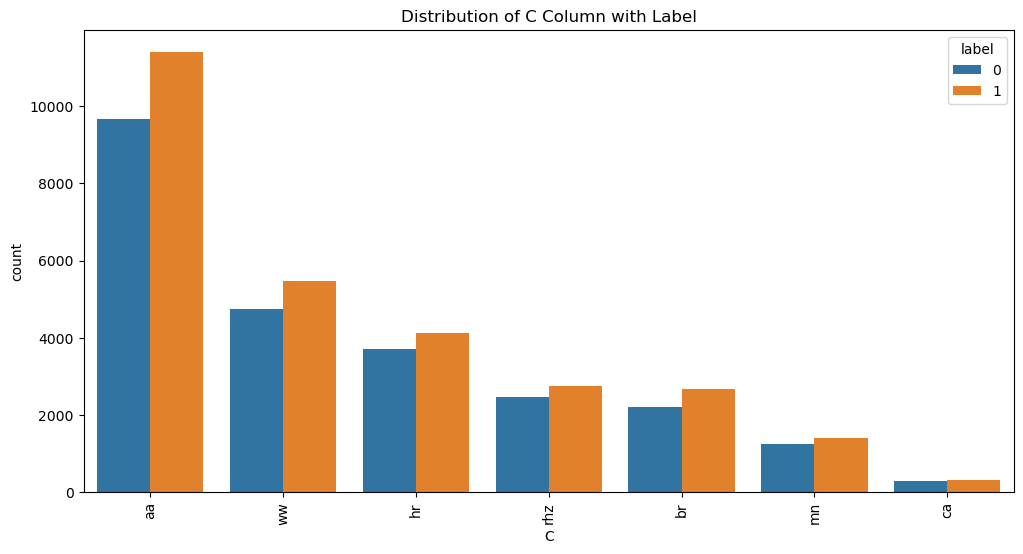

In [16]:
# Plot the distribution of the 'C' column with hue='label'
plt.figure(figsize=(12, 6))
sns.countplot(data=train_copy, x='C', hue='label', order=train_copy['C'].value_counts().index)
plt.title('Distribution of C Column with Label')
plt.xticks(rotation=90)
plt.show()

The graph shows that the label 1 is more prevalent than label 0 in most categories of column C, particularly in the 'aa' and 'ww' categories. This indicates a higher occurrence of label 1 across these categories, suggesting a possible association between these categories and label 1.


### 'Country' label distribution

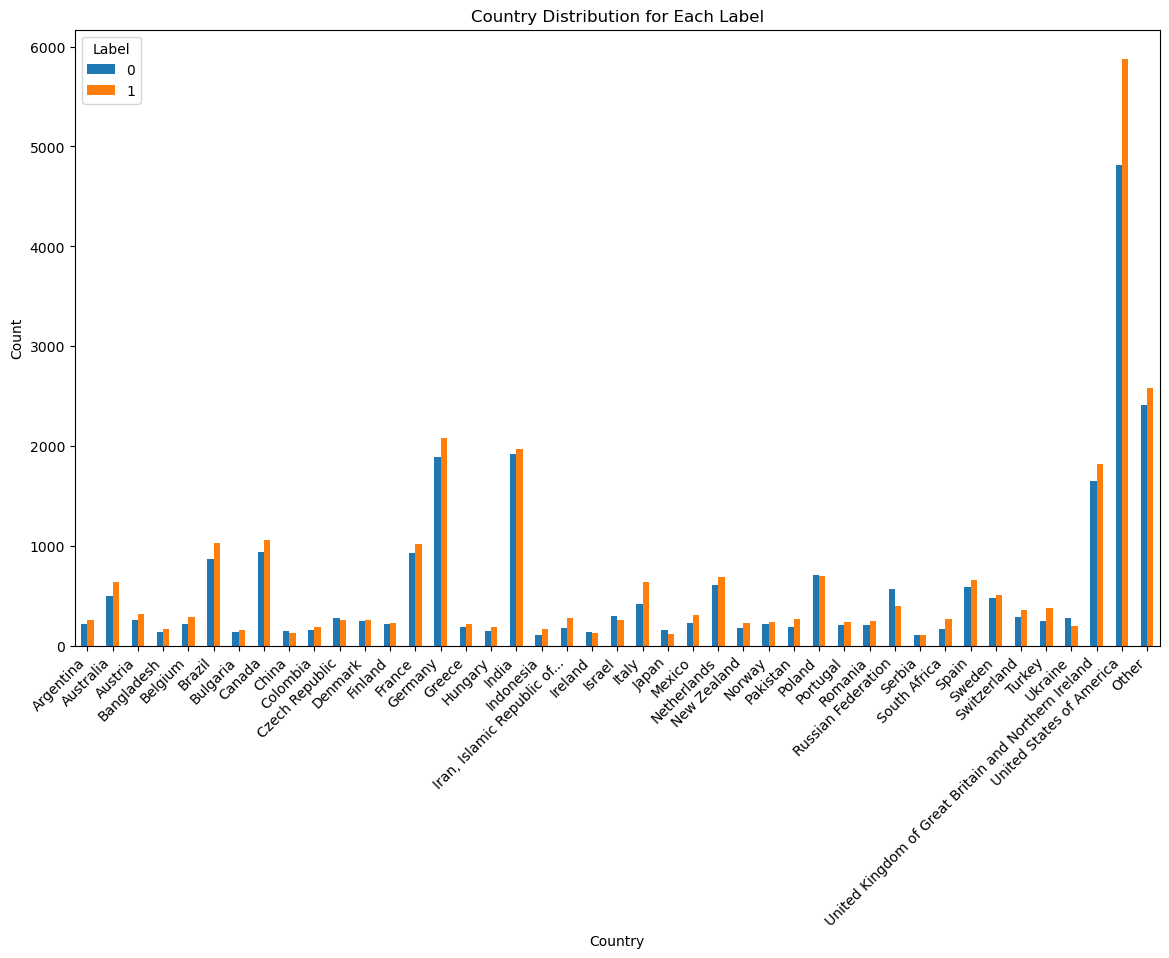

In [17]:
# Get counts for each country per label
country_counts_by_label = train_copy.groupby('label')['country'].value_counts().unstack(fill_value=0)

# Aggregate smaller categories for each label
threshold = 100

# Create a new DataFrame to store aggregated counts
aggregated_counts = pd.DataFrame()

for label in country_counts_by_label.index:
    country_counts = country_counts_by_label.loc[label]
    large_counts = country_counts[country_counts > threshold]
    small_counts = country_counts[country_counts <= threshold]
    other_count = small_counts.sum()
    aggregated_counts[label] = large_counts.append(pd.Series({'Other': other_count}))

# Plot bar charts for each label
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each label in a different color
aggregated_counts.plot(kind='bar', ax=ax)

plt.title('Country Distribution for Each Label')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title='Label')
plt.show()


The graph shows that the United States has the highest number of participants for both labels, with a significant lead over other countries. Additionally, most countries exhibit a relatively balanced distribution between the two labels, indicating no strong preference for either label across different countries.

### 'Stack experience' label distribution

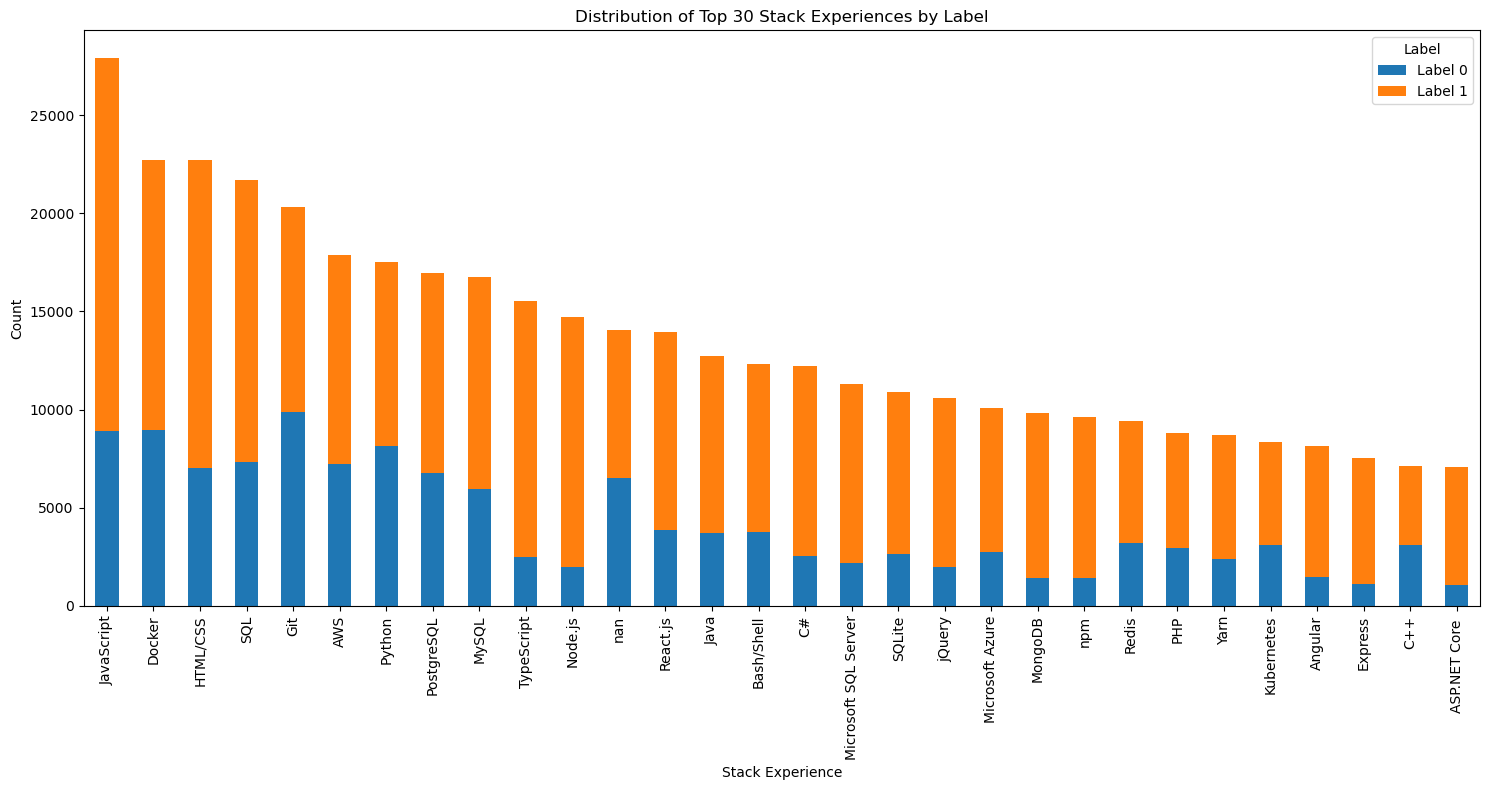

,Percentage Label 0,Percentage Label 1
Node.js,13.365900,86.634100
MongoDB,14.589697,85.410303
npm,14.703738,85.296262
Express,14.893899,85.106101
ASP.NET Core,15.270098,84.729902
TypeScript,15.919340,84.080660
Angular,17.925689,82.074311
jQuery,18.827742,81.172258
Microsoft SQL Server,19.204888,80.795112
C#,20.680049,79.319951


In [18]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
copy_for_stack_vis = train.copy()

# Ensure that all values in the 'stack_experience' column are strings
copy_for_stack_vis['stack_experience'] = train_copy['stack_experience'].astype(str)

# Split the stack_experience into individual technologies and explode the lists
all_stacks = copy_for_stack_vis['stack_experience'].str.split(';').explode()

# Get the top 30 most common technologies
top_30_stacks = [item[0] for item in Counter(all_stacks).most_common(30)]

# Create a dictionary to store the counts for each label (0 and 1)
stack_counts = {stack: {'label_0': 0, 'label_1': 0} for stack in top_30_stacks}

# Count occurrences of each stack experience per label
for _, row in copy_for_stack_vis.iterrows():
    stacks = str(row['stack_experience']).split(';')
    label = row['label']
    for stack in stacks:
        if stack in top_30_stacks:
            if label == 0:
                stack_counts[stack]['label_0'] += 1
            else:
                stack_counts[stack]['label_1'] += 1

# Convert the counts dictionary to a DataFrame for easier plotting
stack_counts_df = pd.DataFrame(stack_counts).T
stack_counts_df = stack_counts_df.rename(columns={'label_0': 'Label 0', 'label_1': 'Label 1'})

# Plot the distribution
stack_counts_df.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribution of Top 30 Stack Experiences by Label')
plt.xlabel('Stack Experience')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Label')
plt.tight_layout()
plt.show()

# Calculate the percentage for each label
stack_counts_df['Total'] = stack_counts_df['Label 0'] + stack_counts_df['Label 1']
stack_counts_df['Percentage Label 0'] = (stack_counts_df['Label 0'] / stack_counts_df['Total']) * 100
stack_counts_df['Percentage Label 1'] = (stack_counts_df['Label 1'] / stack_counts_df['Total']) * 100

# Create the final table
stack_percentage_df = stack_counts_df[['Percentage Label 0', 'Percentage Label 1']]

# Sort by the highest percentage of label 1
stack_percentage_df = stack_percentage_df.sort_values(by='Percentage Label 1', ascending=False)

# Display the table with gradient color
stack_percentage_df = stack_percentage_df.style.background_gradient(subset=['Percentage Label 0', 'Percentage Label 1'])

stack_percentage_df


# Part 2: Pre-Processing


In [19]:
X_train, X_Evaluation = train_test_split(train_copy, test_size=0.2, random_state=42)

In [20]:
preprocessing_train = X_train.copy()

In [21]:
preprocessing_train 

,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
ID,,,,,,,,,,,,,,,,
14125,T,old,No,developer,MA/MSc,Male,No,10.0,0.189733,15.0,aa,181.089420,United States of America,100000.0,C;C++;Java;Python;Chef;Deno;Angular;jQuery;Sve...,0
62021,T,old,No,developer,other,Male,Yes,13.0,4.232576,11.0,rhz,179.399237,United States of America,165000.0,NaN,1
68144,T,young,Yes,developer,BA/BSc,Male,Yes,12.0,-10.623775,9.0,aa,179.272213,Germany,63986.0,Java;Kotlin;Flow;Homebrew,0
61818,T,young,No,developer,BA/BSc,Male,No,9.0,-1.629383,NaN,ww,180.369400,United States of America,110000.0,Go;JavaScript;SQL;TypeScript;Docker;npm;Node.j...,1
64833,T,young,No,NaN,BA/BSc,Male,No,13.0,5.247467,8.0,ww,180.138460,NaN,105414.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72525,F,old,Yes,developer,other,Male,Yes,41.0,9.953698,36.0,mn,179.150087,Germany,140772.0,APL;C#;Groovy;HTML/CSS;JavaScript;SQL;Docker;n...,1
20796,T,young,No,developer,MA/MSc,Male,No,12.0,1.593020,6.0,hr,181.055588,Czech Republic,25980.0,C#;JavaScript;Python;R;Git;ASP.NET;ASP.NET Cor...,0
58945,F,old,No,developer,BA/BSc,Male,No,17.0,10.825694,14.0,ww,180.941287,Brazil,7476.0,HTML/CSS;Java;JavaScript;SQL;npm;jQuery;Node.j...,1


### 2.1 Dealing with Outliers

When removing outliers, it's crucial to ensure that we are not discarding valid measurements simply because they appear unusual. 

From our visualization in part 1 (of the numeric columns) we can make some key observations:

- **A, D  are approximately normally distributed:**
  - Symmetric and centered around the mean.
  - Handle outliers with the IQR method.

- **The distributions of Years of Experience, B, Previous Salary is right-skewed:**
  - Majority of data points are low, with few high outliers.
  - Manage outliers using transformations or capping.



#### Answer to Q1 - Are there any outliers in the data? If so, you should remove them or at least address them

to answer Q1, First we'll check if there are any outliers using the Interquartile Range (IQR) Method. 
This method is valid even if the column is not normally distributed. The IQR (Interquartile Range) method is a non-parametric approach and does not assume any specific distribution for the data. This makes it suitable for identifying outliers in non-normally distributed data.

a. Capping/Flooring Outliers for Approximately Normal Distributions (Columns A and D):

Explanation: Since columns A and D follow approximately normal distributions, the IQR method was used to cap outliers. This involves setting any values below 
𝑄
1
−
1.5
×
IQR
Q1−1.5×IQR to the lower bound and any values above 
𝑄
3
+
1.5
×
IQR
Q3+1.5×IQR to the upper bound.

b. Log Transformation for Right-Skewed Distributions (Columns years_of_experience, B, prev_salary):

Explanation: Columns years_of_experience, B, and prev_salary are right-skewed. Applying a log transformation helps in normalizing these distributions by reducing the impact of large values and spreading out smaller values.

In [22]:
def OutliersRemoval(df,columns):
    # Calculate IQR and identify outliers
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound))

    # Display number of outliers in each numeric column
    print(f'Number of outliers per feature:\n {outliers.sum()}\n')

    # a. Capping/Flooring
    for col in ['A', 'D']:
        df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])
        
    # b. Log Transformation
    for col in ['years_of_experience', 'B', 'prev_salary']:
        df[col] = np.log1p(df[col])

    # Redefine outliers
    outliers2 = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound))

    # Display number of outliers in each numeric column
    print(f'As we can see we successfully removed the outliers:\n {outliers2.sum()}')
    return df

train_without_outliers = OutliersRemoval(preprocessing_train.copy(), numeric_columns )


Number of outliers per feature:
 years_of_experience    1012
A                       641
B                      1851
D                       280
prev_salary             919
dtype: int64

As we can see we successfully removed the outliers:
 years_of_experience    0
A                      0
B                      0
D                      0
prev_salary            0
dtype: int64


#### *Final answer to Q1* - 
the results on the IQR clearly showed that there were outliers in the data, and we remove all of them with the code written above. 

### 2.2 Normalizing the data

#### Answer to Q2 - Are the data normalized? If not, should they be normalized? What is the importance of normalizing the data for this problem? 
As seen in previous sections, some columns (A, D) in our data are approximately normally distributed, while others (Years of Experience, B, Previous Salary) are right-skewed.

Given the varying ranges of numerical columns in our dataset, normalization is necessary.
Normalization is importent when using machine learning models because it ensures that each feature contributes equally to the model's performance. 
For example - 

- **Models like KNN and SVM**: These rely on distance measures, making normalization crucial.
- **Logistic Regression**: Normalization aids in faster convergence during optimization.
- **Decision Trees, Random Forests, and Naive Bayes**: These do not require normalization.

Given that many models benefit from normalized data, we will proceed with normalization using two methods:

1. **StandardScaler**
2. **MinMaxScaler**

In [23]:
# Define the function for Standard Scaling
def standard_scaling(X):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X)
    return scaled_data

# Define the function for Min-Max Scaling
def minmax_scaling(X):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(X)
    return scaled_data

# Apply Standard Scaling
X_standard = standard_scaling(train_without_outliers[numeric_columns])

# Apply Min-Max Scaling
X_minmax = minmax_scaling(train_without_outliers[numeric_columns])

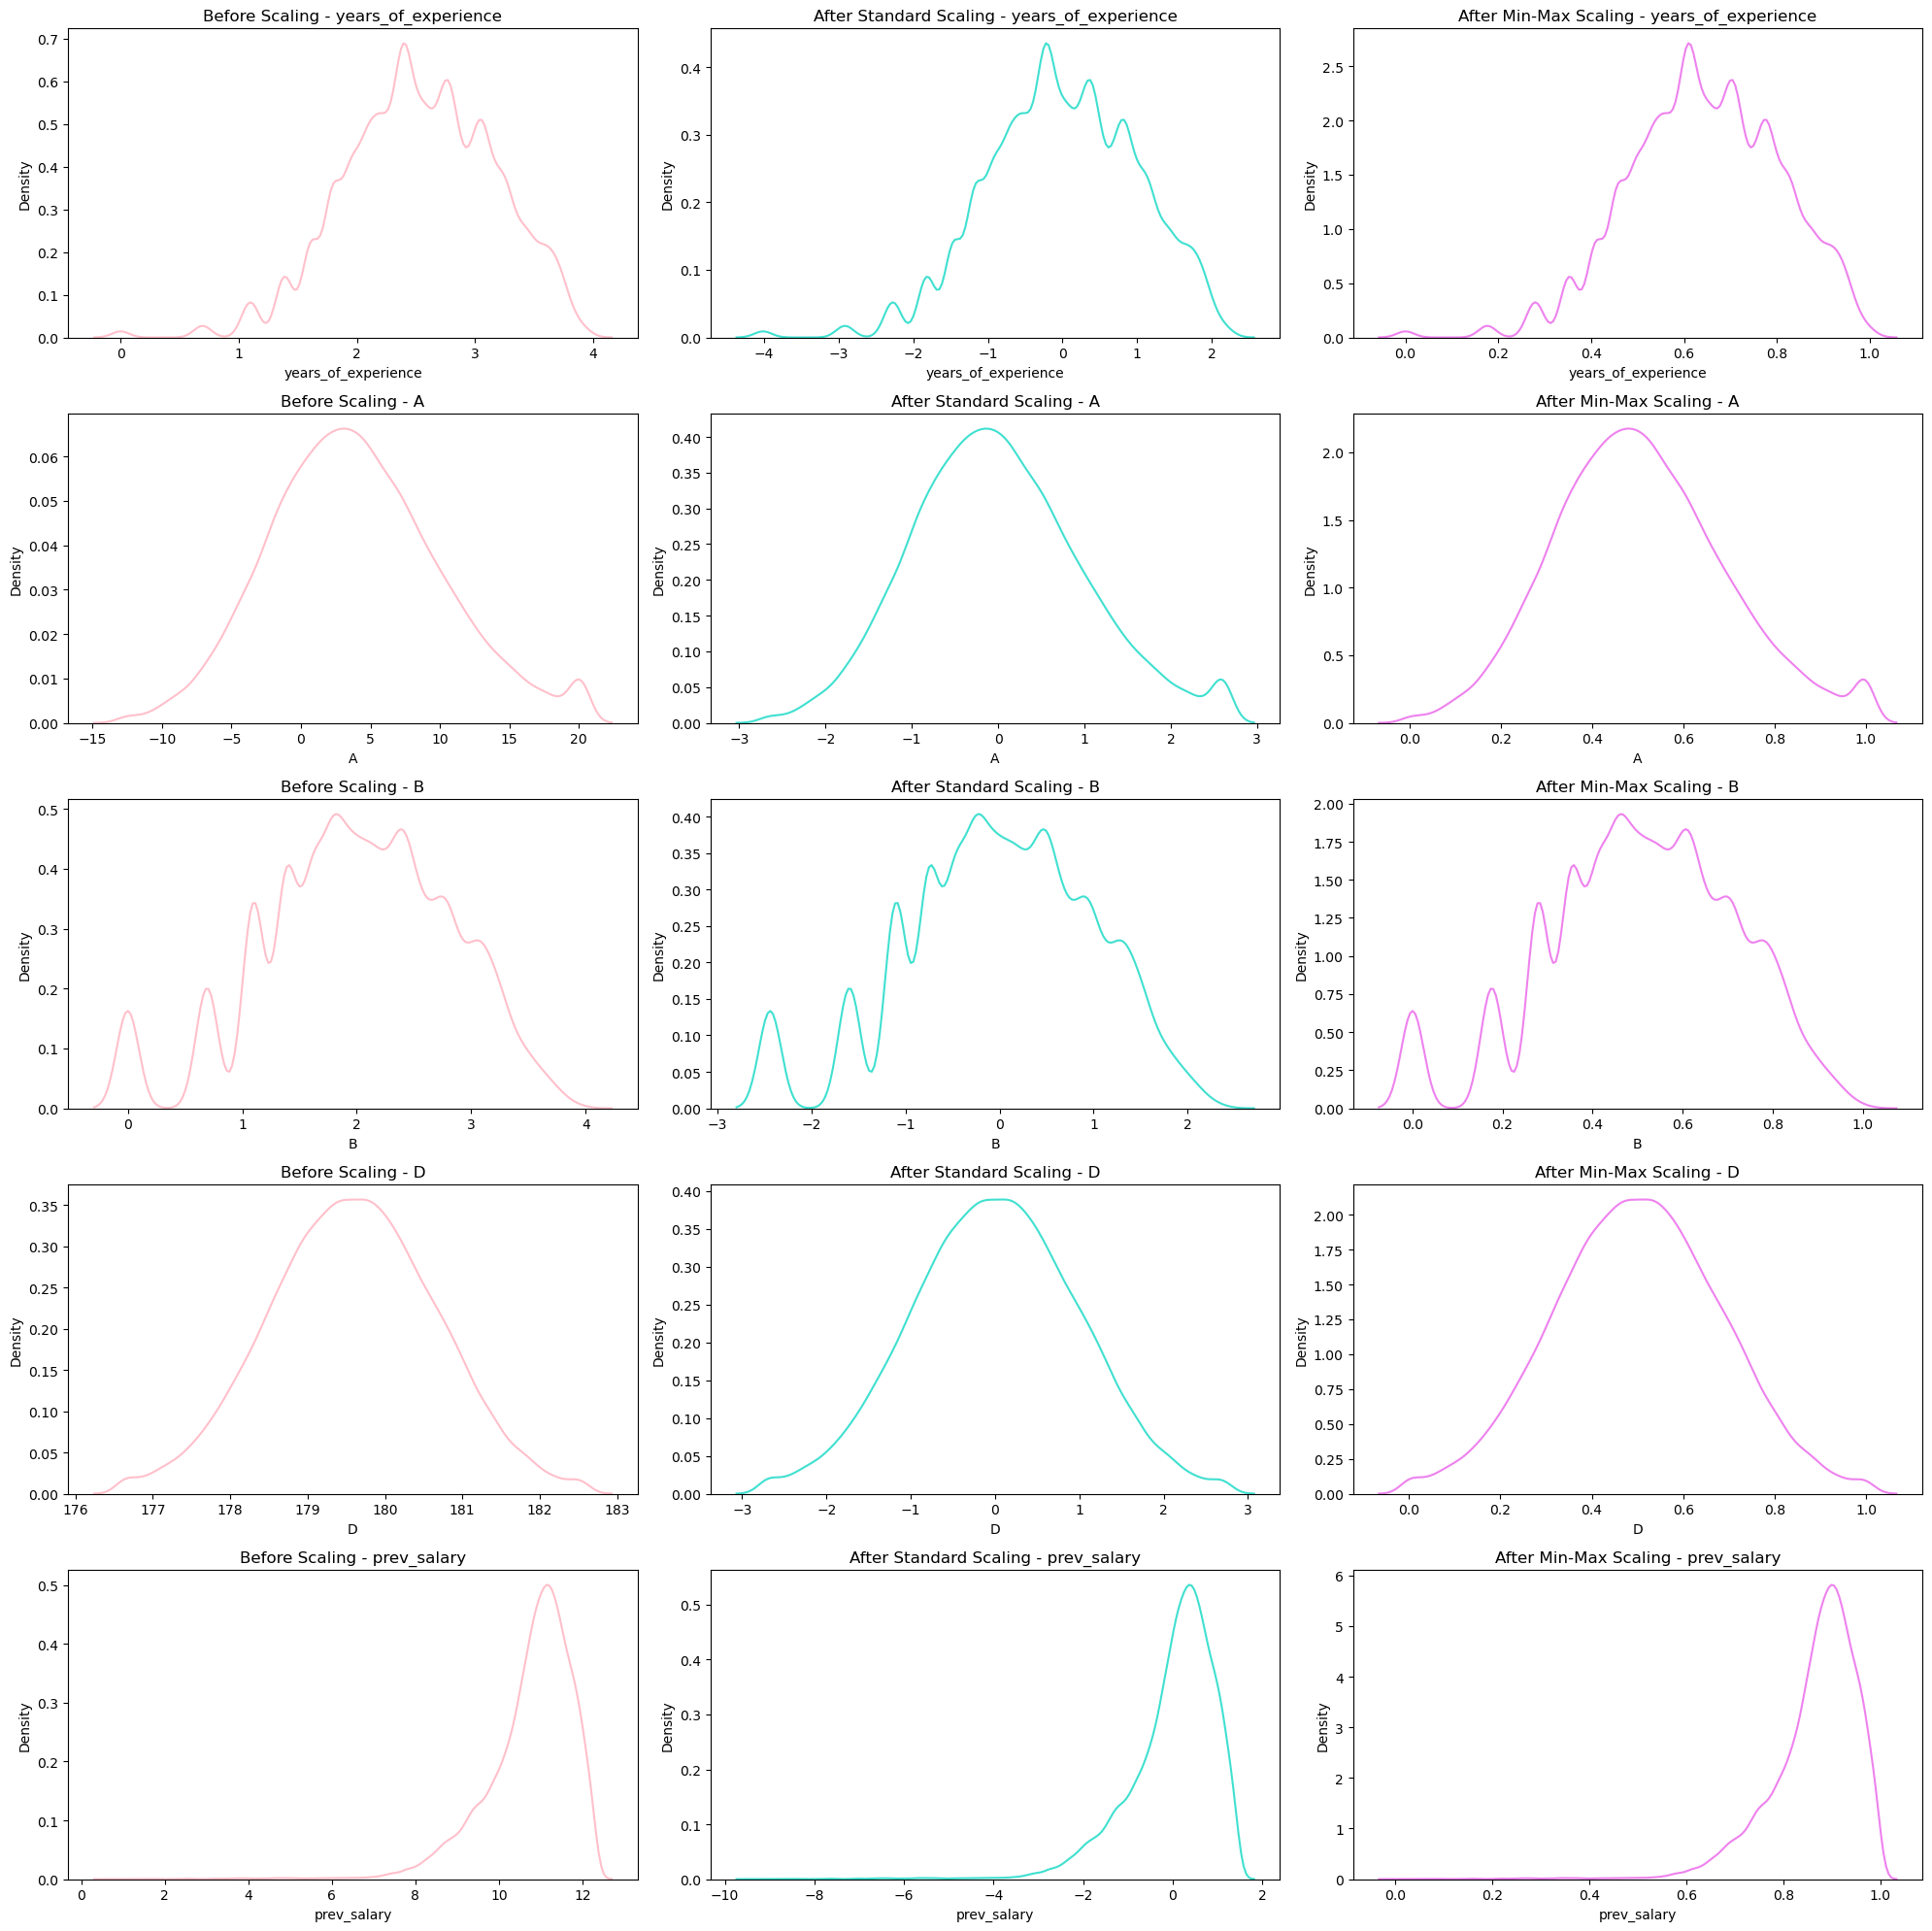

In [24]:
# Convert numpy arrays back to DataFrames
X_standard_df = pd.DataFrame(X_standard, columns=numeric_columns)
X_minmax_df = pd.DataFrame(X_minmax, columns=numeric_columns)

X = train_without_outliers[numeric_columns]
# Plotting the data before and after scaling
fig, axes = plt.subplots(ncols=3, nrows=len(numeric_columns), figsize=(20, 20))

for i, col in enumerate(numeric_columns):
    # Original data
    sns.kdeplot(X[col], ax=axes[i][0], color='pink')
    axes[i][0].set_title(f'Before Scaling - {col}')

    # After Standard Scaling
    sns.kdeplot(X_standard_df[col], ax=axes[i][1], color='turquoise')
    axes[i][1].set_title(f'After Standard Scaling - {col}')

    # After Min-Max Scaling
    sns.kdeplot(X_minmax_df[col], ax=axes[i][2], color='violet')
    axes[i][2].set_title(f'After Min-Max Scaling - {col}')

plt.tight_layout()
plt.show()

The histograms show StandardScaler centers data around zero, while MinMaxScaler scales it to [0, 1]. Both methods yield similar Logistic Regression performance (0.673 vs. 0.6727), indicating either scaler is effective for this dataset. We chose to use the standard normalization method since we want to apply models that assume the features are normally distributed.

In [25]:
# Concat back the scaled data with the other columns
cols = set(train_without_outliers.columns) - set(numeric_columns)
normalized_train = pd.concat([X_standard_df.reset_index(drop=True), train_without_outliers.copy()[cols].reset_index(drop=True)], axis=1)

### 2.3 Handling Missing Values

#### Answer to Q3 - Are there any missing data? How did you choose to handle them and why in that manner?

To answer Q3 we will first check for missing values using the following code:

                     Total Missing Values  Percentage
stack_experience                    11304   25.477248
disability                           2960    6.671325
B                                    2834    6.387343
sex                                  2563    5.776556
C                                    2403    5.415944
education                            2384    5.373121
prev_salary                          2133    4.807411
D                                    2106    4.746557
years_of_experience                  2034    4.584282
age_group                            2016    4.543713
mental_issues                        1909    4.302554
is_dev                               1691    3.811220
A                                    1677    3.779666
country                              1620    3.651198
worked_in_the_past                   1452    3.272555
label                                   0    0.000000


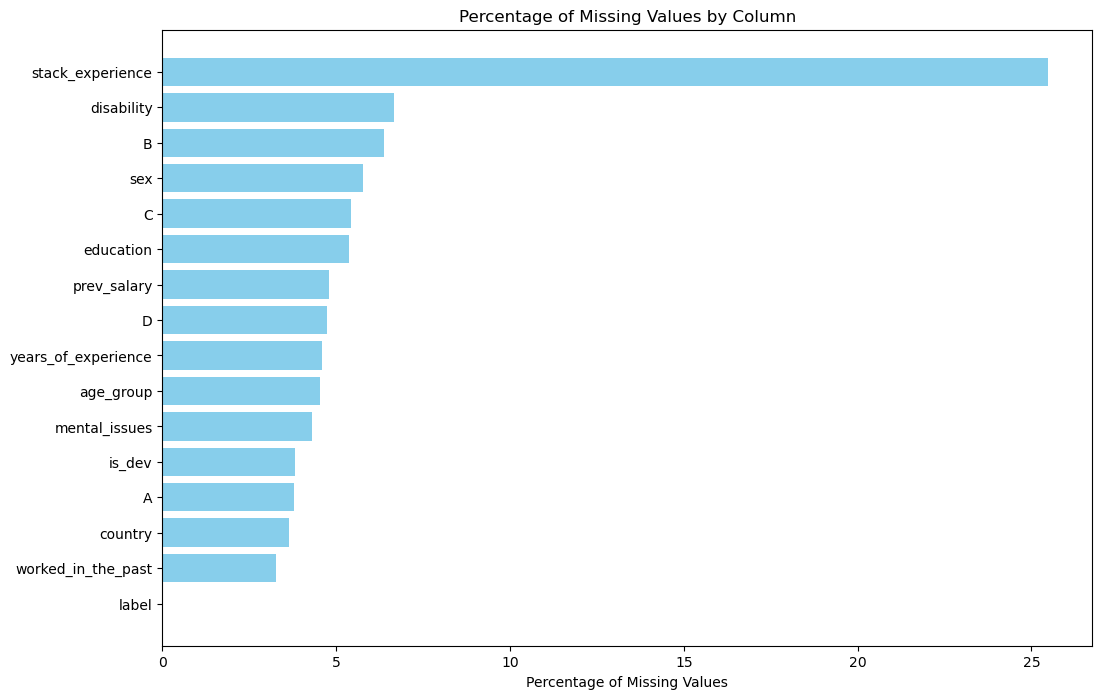

In [26]:
def null_count_and_percent(df):
    # Get all missing values - sorted from the column with the most missing values to the one with the least
    missing_values = df.isnull().sum().sort_values(ascending=False)
    percentage = 100 * (missing_values / df.isnull().count())
    # Creating table
    MissingValuesTable = pd.concat([missing_values, percentage], axis=1, keys=['Total Missing Values', 'Percentage'])
    return MissingValuesTable

# Define the function to visualize the missing values
def visualize_missing_values(df):
    MissingValuesTable = null_count_and_percent(df)
    print(MissingValuesTable)  # Print the table
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.barh(MissingValuesTable.index, MissingValuesTable['Percentage'], color='skyblue')
    plt.xlabel('Percentage of Missing Values')
    plt.title('Percentage of Missing Values by Column')
    plt.gca().invert_yaxis()  # Reverse the order to have the column with the most missing values on top
    plt.show()


# Call the function
visualize_missing_values(normalized_train)


There are missing values in every column except for the label column. 
We will handle missing values by:
1. Removing rows with more than 50% missing data to maintain data integrity.
2. Filling missing values in numerical columns with the mean for floats and the median for integers to preserve central tendencies.
3. Using the mode to fill missing values in categorical columns, ensuring the most common category is retained. Specifically, for the 'stack_experience' column, we will use 'None' to indicate absence of experience.

In [27]:
def FillNulls(data, numeric_columns, categorical_columns):

    # Step 1: Remove rows with too many missing values
    threshold = len(train_copy.columns) * 0.5  # Remove rows with more than 50% missing values
    data = data.dropna(thresh=threshold)

    # Remove the label column from categorical columns if present
    if 'label' in categorical_columns:
        categorical_columns.remove('label')

    # Step 2: Fill the remaining missing values
    # Fill missing values for numeric columns
    for column in numeric_columns:
        if data[column].dtype == 'float64':
            data[column].fillna(data[column].mean(), inplace=True)
        elif data[column].dtype == 'int64':
            data[column].fillna(data[column].median(), inplace=True)

    # Fill missing values for categorical columns
    for column in categorial_columns:
        # Replace missing values in the stack_experience column with an empty string
        if column == 'stack_experience': 
            data['stack_experience'] = data['stack_experience'].fillna('None')
        else:
            data[column].fillna(data[column].mode()[0], inplace=True)

    return data
   
# Identify categorical columns
categorial_columns = list(set(normalized_train.columns) - set(numeric_columns))
#Remove nulls
train_without_nulls = FillNulls(normalized_train.copy(), numeric_columns, categorial_columns)

# Display updated DataFrame
print("\nUpdated DataFrame:")
train_without_nulls


Updated DataFrame:


,years_of_experience,A,B,D,prev_salary,C,label,age_group,mental_issues,worked_in_the_past,sex,country,is_dev,stack_experience,education,disability
0,-0.216738,-0.604600,9.359579e-01,1.382992,0.714724,aa,0,old,No,T,Male,United States of America,developer,C;C++;Java;Python;Chef;Deno;Angular;jQuery;Sve...,MA/MSc,No
1,0.165216,0.046007,5.855927e-01,-0.169018,1.182106,rhz,1,old,Yes,T,Male,United States of America,developer,None,other,No
2,0.047843,-2.344799,3.635450e-01,-0.285658,0.297993,aa,0,young,Yes,T,Male,Germany,developer,Java;Kotlin;Flow;Homebrew,BA/BSc,Yes
3,-0.367691,-0.897347,7.279749e-16,0.721835,0.803678,ww,1,young,No,T,Male,United States of America,developer,Go;JavaScript;SQL;TypeScript;Docker;npm;Node.j...,BA/BSc,No
4,0.165216,0.209332,2.352275e-01,0.509774,0.763933,ww,1,young,No,T,Male,United States of America,developer,None,BA/BSc,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44364,1.905204,0.966698,1.956951e+00,-0.397799,1.033892,mn,1,old,Yes,F,Male,Germany,developer,APL;C#;Groovy;HTML/CSS;JavaScript;SQL;Docker;n...,other,Yes
44365,0.047843,-0.378772,-7.084593e-02,1.351926,-0.543227,hr,0,young,No,T,Male,Czech Republic,developer,C#;JavaScript;Python;R;Git;ASP.NET;ASP.NET Cor...,MA/MSc,No
44366,0.563249,1.107027,8.573570e-01,1.246969,-1.705716,ww,1,old,No,F,Male,Brazil,developer,HTML/CSS;Java;JavaScript;SQL;npm;jQuery;Node.j...,BA/BSc,No
44367,-0.534562,-1.059013,-7.084593e-02,-0.542692,-0.274950,mn,1,young,No,T,Male,Hungary,developer,C#;HTML/CSS;JavaScript;SQL;Git;ASP.NET;ASP.NET...,BA/BSc,No


We can see that the number of rows hasn't changed, indicating that there are no applicants with a substantial amount of missing values.

In [28]:
# Checking if nulls where handled 
missing = train_without_nulls.isnull().sum()
missing

years_of_experience    0
A                      0
B                      0
D                      0
prev_salary            0
C                      0
label                  0
age_group              0
mental_issues          0
worked_in_the_past     0
sex                    0
country                0
is_dev                 0
stack_experience       0
education              0
disability             0
dtype: int64

### 2.4 Dealing with categorical columns

We will use three methods based on the type of variables in each column:

- For columns with ordinal variables, we will use Label Encoding.
- For columns with nominal variables, we will use One-Hot Encoding.
- For columns with nominal variables, that have a large number of subcategories we will use Binary Encoding.



In [29]:
def CategoryToNums(data):
     # Define the columns (ensure these match the actual columns in your dataset)
    ordinal_column = 'education'
    nominal_columns = ['worked_in_the_past', 'disability', 'age_group', 'is_dev', 'sex', 'mental_issues']
    nominal_columns_binary_encoder = ['country', 'C']

    # Label Encoding for the ordinal column
    label_encoder = LabelEncoder()
    data[ordinal_column] = label_encoder.fit_transform(data[ordinal_column].astype(str))

    # One-Hot Encoding for nominal columns
    data = pd.get_dummies(data, columns=nominal_columns)

    # Initialize the binary encoder for the specified columns
    encoder = ce.BinaryEncoder(cols=nominal_columns_binary_encoder)
    # Fit and transform the data
    data = encoder.fit_transform(data)


    # Replace stack_experience with the length of the list of stacks
    data['stack_experience'] = data['stack_experience'].replace('None', '')

    data['stack_experience_length'] = data['stack_experience'].apply(lambda x: len(x.split(';')) if pd.notna(x) else 0)

    # Drop the original stack_experience column 
    data.drop(columns=['stack_experience'], inplace=True)

    
    return data

updated_train = CategoryToNums(train_without_nulls.copy())

In [30]:
updated_train


,years_of_experience,A,B,D,prev_salary,C_0,C_1,C_2,label,country_0,...,age_group_old,age_group_young,is_dev_developer,is_dev_non-developer,sex_Female,sex_Male,sex_Other,mental_issues_No,mental_issues_Yes,stack_experience_length
0,-0.216738,-0.604600,9.359579e-01,1.382992,0.714724,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,14
1,0.165216,0.046007,5.855927e-01,-0.169018,1.182106,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,1
2,0.047843,-2.344799,3.635450e-01,-0.285658,0.297993,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,4
3,-0.367691,-0.897347,7.279749e-16,0.721835,0.803678,0,1,1,1,0,...,0,1,1,0,0,1,0,1,0,13
4,0.165216,0.209332,2.352275e-01,0.509774,0.763933,0,1,1,1,0,...,0,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44364,1.905204,0.966698,1.956951e+00,-0.397799,1.033892,1,0,1,1,0,...,1,0,1,0,0,1,0,0,1,13
44365,0.047843,-0.378772,-7.084593e-02,1.351926,-0.543227,1,0,0,0,0,...,0,1,1,0,0,1,0,1,0,10
44366,0.563249,1.107027,8.573570e-01,1.246969,-1.705716,0,1,1,1,0,...,1,0,1,0,0,1,0,1,0,10
44367,-0.534562,-1.059013,-7.084593e-02,-0.542692,-0.274950,1,0,1,1,0,...,0,1,1,0,0,1,0,1,0,9


### 2.5 Dealing with the dimension of the problem

#### Answer to Q4 - the dimensionality of the problem too high? Why can high dimensionality cause a problem? How can we identify that the problem's dimensionality is too high? 


we need to check if there is high dimensionality problem, because it can lead to issues such as:                                                                                    
* Curse of Dimensionality
* Overfitting
* Increased Computational Complexity
* Irrelevant Features

To determine if high dimensionality is an issue, we can start by examining the feature-to-sample ratio.
If the number of features is comparable to or greater than the number of samples, the problem might suffer from high dimensionality.

In [31]:
data_shape = updated_train.shape
data_shape

(44369, 32)

Befor processing: We had 16 fetures and 55,462 samples, this ratio suggests that the dimensionality is relatively low.

After processing: In the processed data set we have 32 features and 44,348 samples, this ratio also suggests that the dimensionality is relatively low. 

In the next section we will apply 2 methoods to learn more about the dimension and reduce it if needed. 

### Reducing dimension using PCA & Backward Selection 

#### PCA

Principal Component Analysis (PCA) helps us understand the variance explained by each component and assess the necessity of all features. 

In [32]:
def get_principal_components(X, p):
    """
    Returns array of principal components explaining (100*p)% of the variance
    X: 2d numpy array of data we want to apply PCA on. 
    p: float in the range (0,1]. The proportion of variance explained by components
    """
    pca = PCA(p)
    pca.fit(X)
    comp = pca.components_
    return comp

components = get_principal_components(updated_train.drop(columns=['label']).values, 0.99)
print ('Number of components which preserve at least 99% of the variance:', len(components))


Number of components which preserve at least 99% of the variance: 16


The PCA of the dataset revealed that the first 17 principal components explain approximately 99% of the variance. This indicates that these 17 components effectively capture the majority of the information in the data. 
This means we can reduce the dimensionality without significant loss of information.

### Backward Selection

we will try another methood to reduce the complexity of dataet.
we will use backward selection algorithm, using linear regression and Mallows cp penalization. </br> 

**in order to do that we will use the following equations :** <br><br>
$ C_p= MSE+2\frac{d+1}{n}\hat{\sigma}^2$ <br><br>
Where : $ \hat{\sigma}^2 = \frac{RSS_{all features}}{n-\#features-1} $,   and $\#features$ is the number of all features

we will follow the next steps:
1. Implement the function get_sigma_hat_squared function which retrieves the estimate of sigma_hat_squared. <br>
2. Implement the function get_mallows_cp_score which retrieves the mallows Cp score for linear regression. <br>
3. create a function that gets as input a list of features and returns the best subset of features, containing one less feature, according to the mallows Cp score.
4. Final step is to run a Backward selection wrapper that print a graph of the mallows C_p score w.r.t the number of features, and print number of features which were chosen

In [33]:
# Define the feature matrix (X) and the target vector (y)
X = updated_train.drop(columns=['label']).values
y = updated_train['label'].values

# List of all feature names
all_features = updated_train.drop(columns=['label']).columns.tolist()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


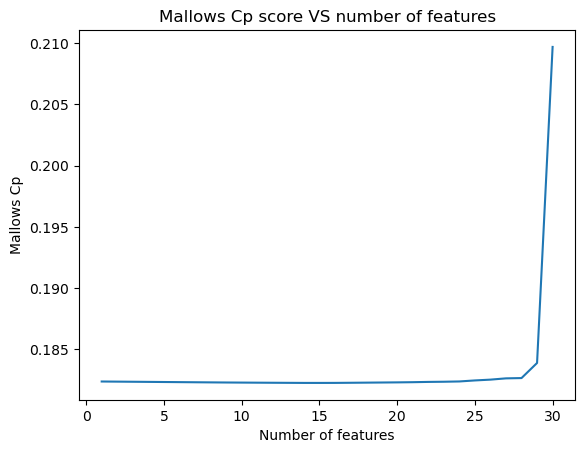

Number of selected features by backward selection: 16
Selected features: [1, 2, 3, 4, 8, 10, 12, 13, 16, 20, 22, 24, 26, 27, 29, 30]
Selected feature names: ['A', 'B', 'D', 'prev_salary', 'country_0', 'country_2', 'country_4', 'country_5', 'education', 'disability_Yes', 'age_group_young', 'is_dev_non-developer', 'sex_Male', 'sex_Other', 'mental_issues_Yes', 'stack_experience_length']


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from typing import List, Dict
import matplotlib.pyplot as plt
import numpy as np

def get_sigma_hat_squared(X, y):
    linear_r = LinearRegression()
    linear_r.fit(X, y)
    rss = np.sum((y - linear_r.predict(X)) ** 2)
    sigma_sq = rss / (X.shape[0] - X.shape[1] - 1)
    return sigma_sq

def get_mallows_cp_score(X, y, sigma_hat_squared):
    linear_r = LinearRegression()
    linear_r.fit(X, y)
    mse = mean_squared_error(y, linear_r.predict(X))
    cp = mse + 2 * sigma_hat_squared * ((X.shape[1] + 1) / X.shape[0])
    return cp

def remove_feature(X, y, current_features, sigma_hat_squared):
    best_score = float('inf')
    best_features_lst = current_features[:]  # Initialize with the current features
    
    for i in range(len(current_features)):
        sub_feature_lst = current_features[:]
        sub_feature_lst.pop(i)
        sub_feat_arr = X[:, sub_feature_lst]
        cp_score = get_mallows_cp_score(sub_feat_arr, y, sigma_hat_squared)
        
        if cp_score < best_score:
            best_score = cp_score
            best_features_lst = sub_feature_lst[:]
            
    return {'features': sorted(best_features_lst), 'score': best_score}

def backward_selection(X, y):
    sigma_hat_squared = get_sigma_hat_squared(X, y)
    current_features = list(range(X.shape[1]))
    models_lst = []
    
    while len(current_features) > 1:
        model = remove_feature(X, y, current_features, sigma_hat_squared)
        current_features = model['features']
        models_lst.append(model)
    
    scores_lst = [x['score'] for x in models_lst]
    plt.plot(range(1, len(scores_lst) + 1), scores_lst)
    plt.xlabel("Number of features")
    plt.ylabel("Mallows Cp")
    plt.title("Mallows Cp score VS number of features")
    plt.show()

    best_model = min(models_lst, key=lambda x: x['score'])
    best_features = best_model['features']
    return sorted(best_features)

# Run backward selection on the training data
selected_features = backward_selection(X_train, y_train)
print ('Number of selected features by backward selection:', len(selected_features))
print ('Selected features:', selected_features)

# Get the names of the selected features
selected_feature_names = [all_features[i] for i in selected_features]
print ('Selected feature names:', selected_feature_names)


#### Comparison

In [35]:
# calculate the test MSE for each reduced dataset
x_backward_reduced_train = X_train[:,selected_features]
x_backward_reduced_test = X_test[:,selected_features]

# get components based on train set:
train_components = get_principal_components(X_train,0.99)
x_pca_train = np.dot(X_train, train_components.T)
x_pca_test = np.dot(X_test, train_components.T)

backward_s=LinearRegression()
pca_s=LinearRegression()

backward_s.fit(x_backward_reduced_train,y_train)
pca_s.fit(x_pca_train,y_train)


test_mse_backward = mean_squared_error(y_test,backward_s.predict(x_backward_reduced_test))
test_mse_pca = mean_squared_error(y_test,pca_s.predict(x_pca_test))
train_mse_backward = mean_squared_error(y_train,backward_s.predict(x_backward_reduced_train))
train_mse_pca = mean_squared_error(y_train,pca_s.predict(x_pca_train))

print(f'MSE train - PCA: {round(train_mse_pca,4)}')
print(f'MSE test - PCA: {round(test_mse_pca,4)}')
print(f'MSE train - backward: {round(train_mse_backward,4)}')
print(f'MSE test - backward: {round(test_mse_backward,4)}')

MSE train - PCA: 0.1831
MSE test - PCA: 0.1843
MSE train - backward: 0.1821
MSE test - backward: 0.1828


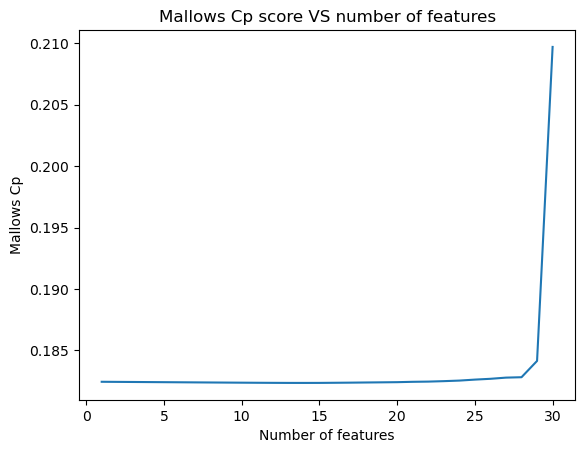

Number of selected features by backward selection: 17
Selected features: [1, 2, 3, 4, 8, 10, 11, 12, 13, 16, 20, 22, 24, 26, 27, 29, 30]
Selected feature names: ['A', 'B', 'D', 'prev_salary', 'country_0', 'country_2', 'country_3', 'country_4', 'country_5', 'education', 'disability_Yes', 'age_group_young', 'is_dev_non-developer', 'sex_Male', 'sex_Other', 'mental_issues_Yes', 'stack_experience_length']
Shape of the reduced dataset: (44369, 18)


In [36]:
# Apply backward selection on the entire dataset
selected_features = backward_selection(X, y)
print ('Number of selected features by backward selection:', len(selected_features))
print ('Selected features:', selected_features)

# Get the names of the selected features
selected_feature_names = [all_features[i] for i in selected_features]
print ('Selected feature names:', selected_feature_names)

# Create a new DataFrame with the selected features and the label
reduced_train = updated_train.copy()[selected_feature_names + ['label']]
print ('Shape of the reduced dataset:', reduced_train.shape)


In [37]:
reduced_train

,A,B,D,prev_salary,country_0,country_2,country_3,country_4,country_5,education,disability_Yes,age_group_young,is_dev_non-developer,sex_Male,sex_Other,mental_issues_Yes,stack_experience_length,label
0,-0.604600,9.359579e-01,1.382992,0.714724,0,0,0,0,0,2,0,0,0,1,0,0,14,0
1,0.046007,5.855927e-01,-0.169018,1.182106,0,0,0,0,0,4,0,0,0,1,0,1,1,1
2,-2.344799,3.635450e-01,-0.285658,0.297993,0,0,0,0,0,0,1,1,0,1,0,1,4,0
3,-0.897347,7.279749e-16,0.721835,0.803678,0,0,0,0,0,0,0,1,0,1,0,0,13,1
4,0.209332,2.352275e-01,0.509774,0.763933,0,0,0,0,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44364,0.966698,1.956951e+00,-0.397799,1.033892,0,0,0,0,0,4,1,0,0,1,0,1,13,1
44365,-0.378772,-7.084593e-02,1.351926,-0.543227,0,0,0,0,1,2,0,1,0,1,0,0,10,0
44366,1.107027,8.573570e-01,1.246969,-1.705716,0,0,0,1,0,0,0,0,0,1,0,0,10,1
44367,-1.059013,-7.084593e-02,-0.542692,-0.274950,0,1,1,0,1,0,0,1,0,1,0,0,9,1


## we need to answer Q5 - How did dimensionality reduction affect the model?

### 2.6 Creating new features and/or performing mathematical manipulation on existing features

### 2.7 Applying the preprocessing to the Test set

In [38]:
# Test Pre-Processing function
def test_pre_processing(test_copy):
    # Normalizing the data:
    cols = list(set(test_copy.columns) - set(numeric_columns))
    standard_scaled = standard_scaling(test_copy[numeric_columns])
    standard_scaled_df = pd.DataFrame(standard_scaled, columns=numeric_columns)
    standard_scaled_data_test = pd.concat([standard_scaled_df.reset_index(drop=True), test_copy[cols].reset_index(drop=True)], axis=1)

    # Removing NULLS:
    test_copy_without_nulls = FillNulls(standard_scaled_data_test, numeric_columns, categorial_columns)
    
    # Handling categorical features:
    test_final = CategoryToNums(test_copy_without_nulls)

    return test_final


In [39]:
X_test = test_pre_processing(test.copy())
X_test.shape

(18000, 31)

# Part 3: Classification Model Implementation

In this part we will Build two primary models & Select two advanced models and apply them to the dataset:
For the primery models we choose:
1. KNN
2. Logistic Regression

For the advanced models we choose:*******
Multi-Layer Perceptron (ANN)
Decision Tree
Random Forest

before running the model we will create the train and test set 

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

def ModelEvaluation(model, x_train, y_train, x_test, y_test, class_names=[1, 0], k=5):
    # Predict on test set
    predictions = model.predict(x_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    mean_abs_error = np.mean(np.abs(predictions - y_test))

    # Print evaluation results
    print('============================== Model Evaluation ==============================')
    print(f'Classifier: {model}')

    # Plot confusion matrix
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')


    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.2f}")
    print(f"Precision: {tp / (tp + fp):.2f}")
    print(f"Recall: {tp / (tp + fn):.2f}")

    # K-Fold Cross Validation and ROC plots
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    plt.subplot(1, 2, 2)
    
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        model.fit(x_train_fold, y_train_fold)
        y_proba = model.predict_proba(x_test_fold)[:, 1]

        fpr, tpr, _ = roc_curve(y_test_fold, y_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        plt.plot(fpr, tpr, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r', lw=2)

    # Calculate ROC curve and AUC for train and test sets
    train_proba = model.predict_proba(x_train)[:, 1]
    test_proba = model.predict_proba(x_test)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_proba)

    train_auc = auc(fpr_train, tpr_train)
    test_auc = auc(fpr_test, tpr_test)

    print(f"Train AUC: {train_auc:.2f}")
    print(f"Validation AUC: {test_auc:.2f}")

    # Plot ROC curve
    plt.plot(fpr_test, tpr_test, label=f' AUC = {test_auc:.2f}')
    plt.plot(fpr_train, tpr_train, label=f'Train AUC = {train_auc:.2f}', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return mean_abs_error



In [41]:
# Define the feature matrix (X) and the target vector (y)
X = reduced_train.drop(columns=['label']).values
y = reduced_train['label'].values

# Split the data into training and test sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

## Primary models 

### KNN 

KNN Implementation and Evaluation


============================== Model Evaluation ==============================
Classifier: KNeighborsClassifier(algorithm='brute', n_neighbors=7)
Accuracy: 0.76
Precision: 0.76
Recall: 0.80
Train AUC: 0.88
Validation AUC: 0.83


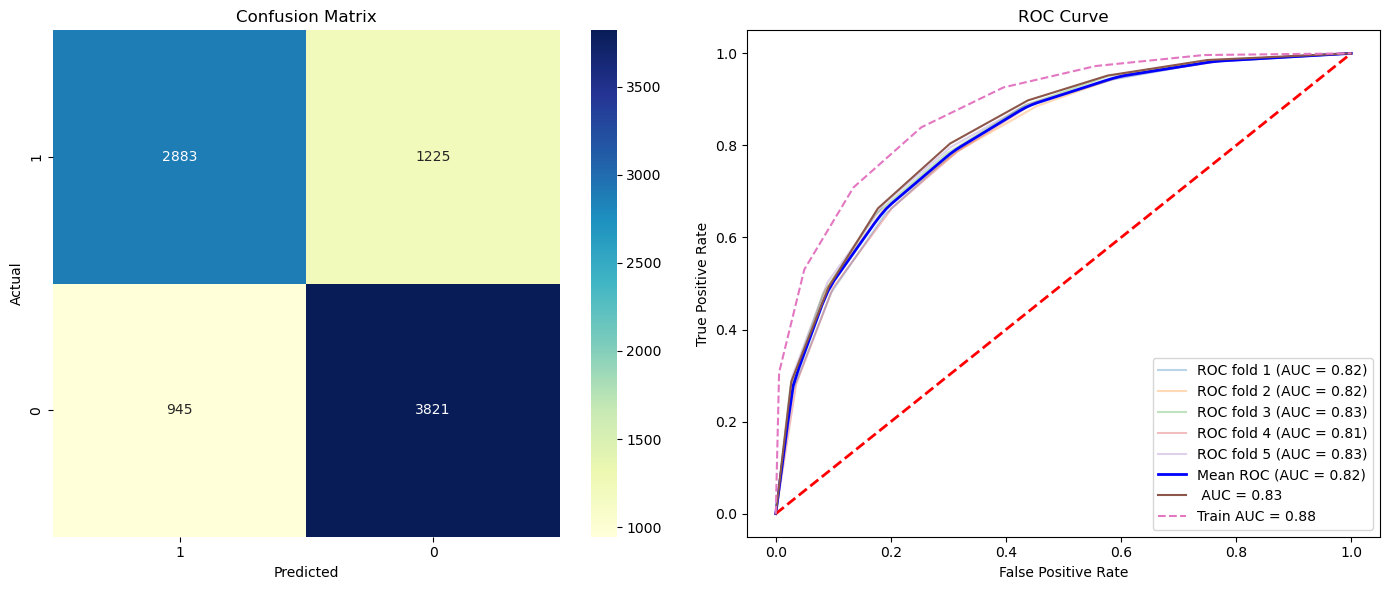

The optimal parameters: KNeighborsClassifier(algorithm='brute', n_neighbors=7)
Mean Absolute Error: 0.24453459544737435


In [42]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['brute']
}

# Create the KNN model
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_knn = grid_search.best_estimator_

# Evaluate the best model using your evaluation function
knn_mae = ModelEvaluation(best_model_knn, X_train, y_train, X_validation, y_validation)

print(f'The optimal parameters: {best_model_knn}')
print(f'Mean Absolute Error: {knn_mae}')


### Logistic Regression 
Logistic Regression Implementation and Evaluation

============================== Model Evaluation ==============================
Classifier: LogisticRegression(C=0.1, max_iter=50, penalty='l1', solver='liblinear')
Accuracy: 0.73
Precision: 0.74
Recall: 0.75
Train AUC: 0.80
Validation AUC: 0.80


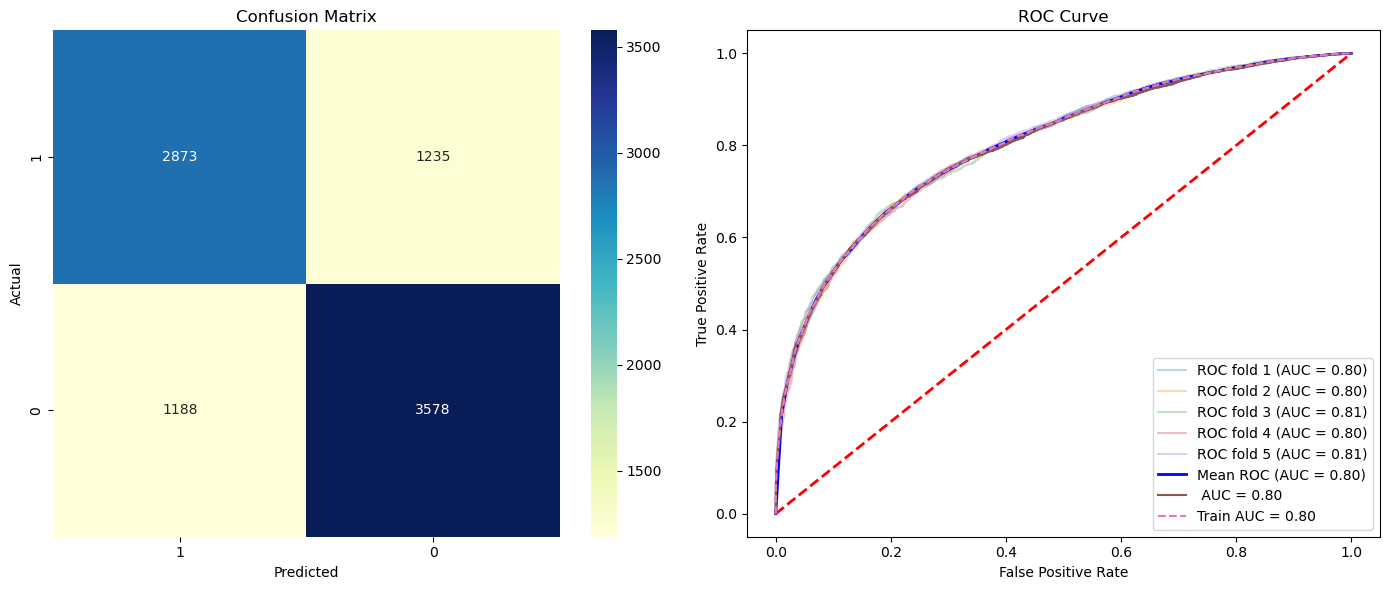

The optimal parameters: LogisticRegression(C=0.1, max_iter=50, penalty='l1', solver='liblinear')
Mean Absolute Error: 0.2730448501239576


In [43]:
# hyperparameter grid
param_grid = {'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10,100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [10, 20, 50]}

# Create the logistic regression model
model = LogisticRegression()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_lr = grid_search.best_estimator_

# Evaluate the best model using your evaluation function
lr_mae = ModelEvaluation(best_model_lr, X_train, y_train, X_validation, y_validation)

print(f'The optimal parameters: {best_model_lr}')
print(f'Mean Absolute Error: {lr_mae}')


### Naive Bayes
Naive Bayes Implementation and Evaluation

============================== Model Evaluation ==============================
Classifier: GaussianNB(var_smoothing=0.002848035868435802)
Accuracy: 0.75
Precision: 0.78
Recall: 0.74
Train AUC: 0.84
Validation AUC: 0.84


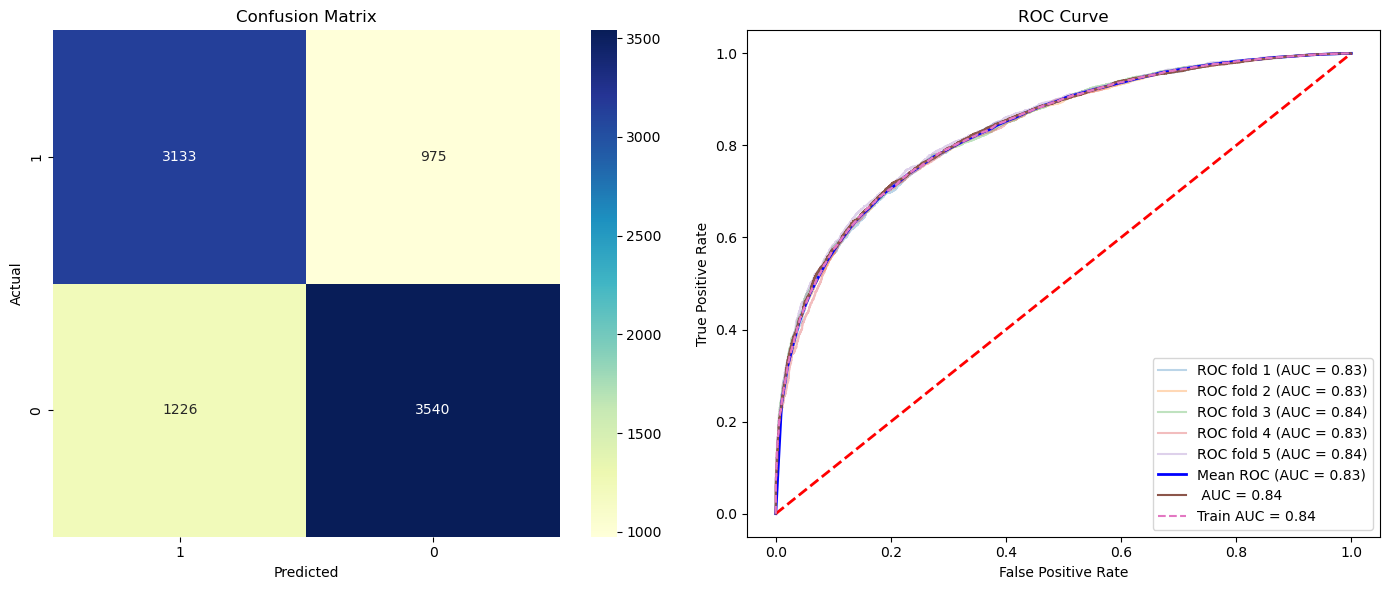

The optimal parameters: GaussianNB(var_smoothing=0.002848035868435802)
Mean Absolute Error: 0.24802794681090828


In [44]:
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Create the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform grid search
grid_search = GridSearchCV(nb_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_nb = grid_search.best_estimator_

# Evaluate the best model using your evaluation function
nb_mae = ModelEvaluation(best_model_nb, X_train, y_train, X_validation, y_validation)

print(f'The optimal parameters: {best_model_nb}')
print(f'Mean Absolute Error: {nb_mae}')

## Advanced models

### Adaptive Boosting
Adaptive Boosting Implementation and Evaluation


============================== Model Evaluation ==============================
Classifier: AdaBoostClassifier(learning_rate=1, n_estimators=140, random_state=42)
Accuracy: 0.79
Precision: 0.79
Recall: 0.82
Train AUC: 0.87
Validation AUC: 0.87


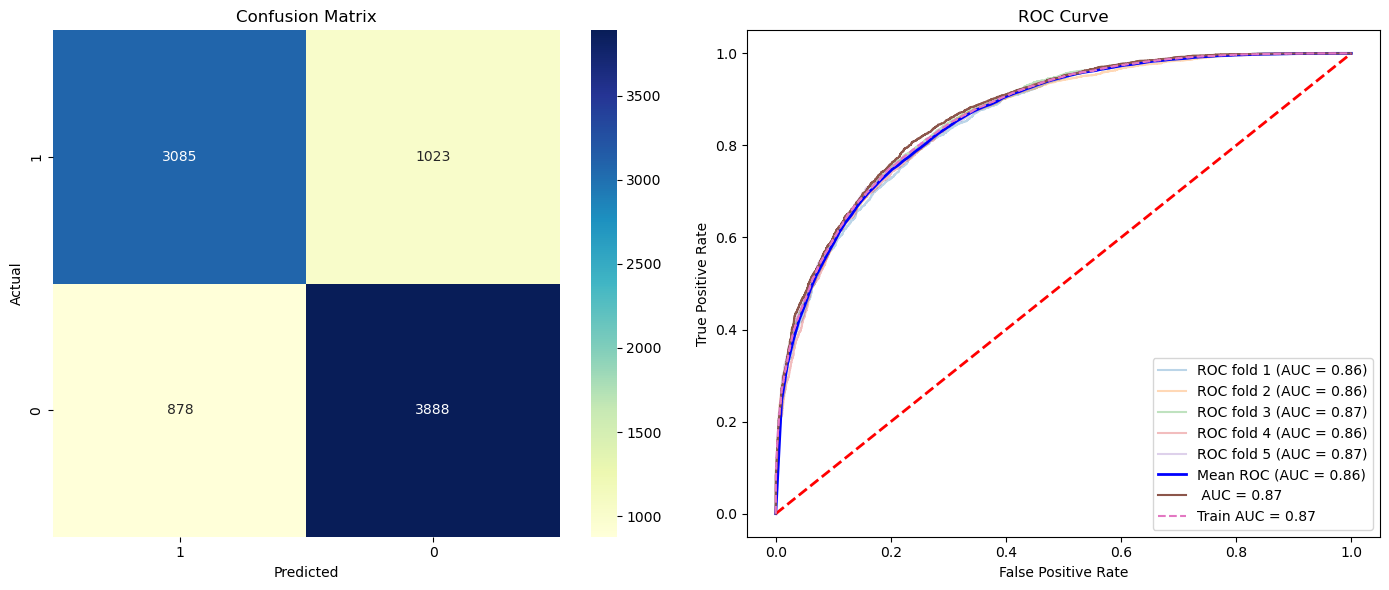

The optimal parameters: AdaBoostClassifier(learning_rate=1, n_estimators=140, random_state=42)
Mean Absolute Error: 0.21422132071219294


In [45]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [140,150,160],
    'learning_rate': [0.8,1,1.2,1.5],
}

# Create the AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(adaboost, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_adaboost = grid_search.best_estimator_

# Evaluate the best model using your evaluation function
adaboost_mae = ModelEvaluation(best_model_adaboost, X_train, y_train, X_validation, y_validation)

print(f'The optimal parameters: {best_model_adaboost}')
print(f'Mean Absolute Error: {adaboost_mae}')


### Random Forests
Random Forests Implementation and Evaluation

============================== Model Evaluation ==============================
Classifier: RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200, random_state=42)
Accuracy: 0.78
Precision: 0.80
Recall: 0.79
Train AUC: 0.88
Validation AUC: 0.86


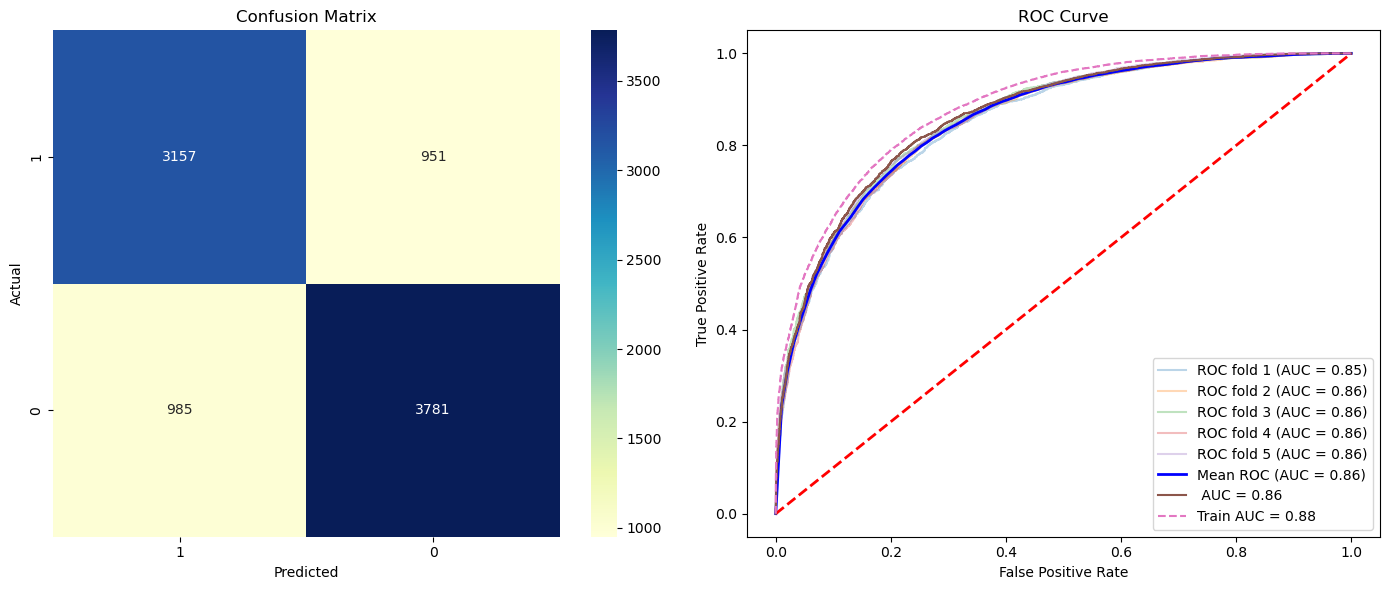

The optimal parameters: RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200, random_state=42)
Mean Absolute Error: 0.21816542709037637


In [46]:
# Define the hyperparameter grid for Random Forests
param_grid = {
    'n_estimators': [100, 200], 
    'criterion': ['gini', 'entropy'],
    'max_depth': [10],
    'max_features': [ 'sqrt'],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_rf = grid_search.best_estimator_

# Evaluate the best model using your evaluation function
rf_mae = ModelEvaluation(best_model_rf, X_train, y_train, X_validation, y_validation)

print(f'The optimal parameters: {best_model_rf}')
print(f'Mean Absolute Error: {rf_mae}')


### Decision Tree
Decision Tree implementation and evaluation

============================== Model Evaluation ==============================
Classifier: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42)
Accuracy: 0.77
Precision: 0.78
Recall: 0.81
Train AUC: 0.88
Validation AUC: 0.84


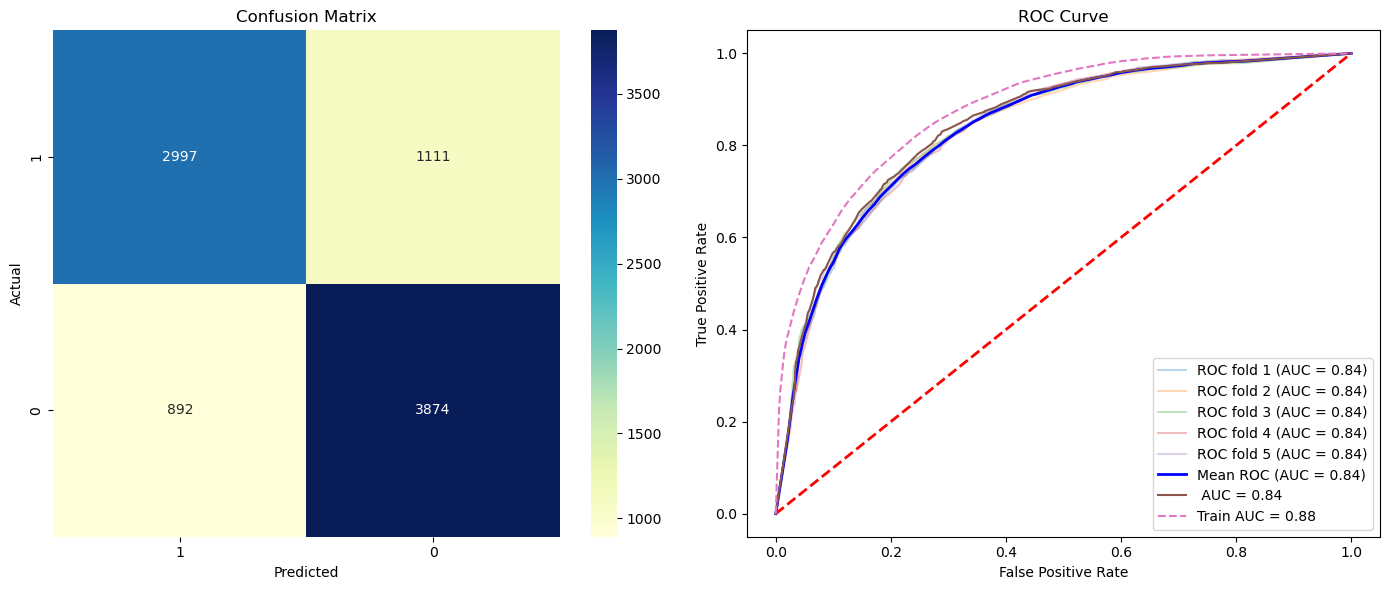

The optimal parameters: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42)
Mean Absolute Error: 0.22571557358575614


In [47]:
# Define the hyperparameter grid for Decision Trees
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(dt_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_dt = grid_search.best_estimator_

# Evaluate the best model using your evaluation function
dt_mae = ModelEvaluation(best_model_dt, X_train, y_train, X_validation, y_validation)

print(f'The optimal parameters: {best_model_dt}')
print(f'Mean Absolute Error: {dt_mae}')

============================== Model Evaluation ==============================
Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=90,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Accuracy: 0.79
Precision: 0.79
Recall: 0.82
Train AUC: 0.88
Validation AUC: 0.87


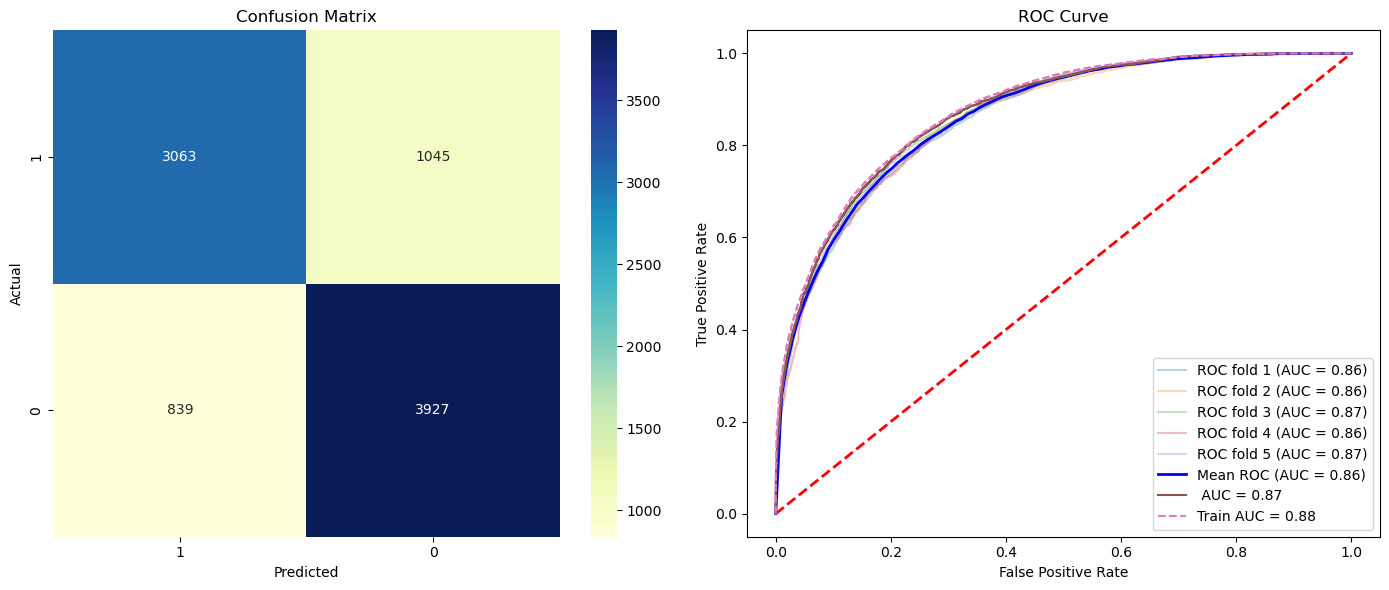

The optimal parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=90,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Mean Absolute Error: 0.21230561189993238


In [48]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [80, 90,100,120],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [5, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform randomized search
random_search = RandomizedSearchCV(xgb_model, param_grid, cv=3)
random_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_xgb = random_search.best_estimator_

# Evaluate the best model using your evaluation function
xgb_mae = ModelEvaluation(best_model_xgb, X_train, y_train, X_validation, y_validation)
print(f'The optimal parameters: {best_model_xgb}')
print(f'Mean Absolute Error: {xgb_mae}')
